# DATA 601 PROJECT
## pop health 3

                                                                                         File created by: Nisha Budhathoki                                                                                        

  ## COVID-19: Analyzing the pattern of all-cause mortality  and Excess deaths
   
   ##### PART -1
   
   
   
   
   
   ***Did all-cause mortality change during the pandemic compared to the pre-pandemic period?***
   
  

# From table 1  

In [2]:
library("tidyverse")
library(plotly)
library(ggplot2)
library(glmnet)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded g

In [1]:
OECD = read.csv("main_oecd_file.csv")
head(OECD)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2015,174,,
2,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2016,140,,
3,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2017,167,,
4,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2018,149,,
5,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2019,182,,
6,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2020,171,,


we are taking Gender and Age as total

In [3]:
df = OECD %>%
   filter(GENDER=="TOTAL" ,Age == "Total")

In [4]:
head(df)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2015,2925,,
2,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2016,2799,,
3,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2017,2895,,
4,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2018,2819,,
5,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2019,2966,,
6,AUS,Australia,1,TOTAL,Total,ALLCAUNB,All-cause deaths (number),2020,2928,,


# D = DIFFERENCE IN methodology
## Excess deaths in Week 53, 2020 are calculated relative to deaths reported in Week 53, 2015 only. Week 1 of each year is usually the week containing January 4th or the first Tuesday of the year, which means that some years (including 2020) report a 53rd week that starts before the end of the calendar year and run into the first few days of the subsequent year.



In [5]:
flag_code = df %>% filter( Flag.Codes == "D")
head(flag_code)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,ESP,Spain,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,63.9,D,Difference in methodology
2,PRT,Portugal,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,487.9,D,Difference in methodology
3,ITA,Italy,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,1637.1,D,Difference in methodology
4,CZE,Czechia,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,1211.3,D,Difference in methodology
5,SVK,Slovak Republic,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,921.2,D,Difference in methodology
6,DNK,Denmark,53,TOTAL,Total,EXCESSNB,Excess deaths (number),2020,166.2,D,Difference in methodology




# Let's first see the data for New Zealand only.

In [16]:
NZDF <- df %>% 
 filter(COUNTRY == "NZL")
head(NZDF)

,COUNTRY,Country,WEEK,GENDER,AGE,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2015,564,,
2,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2016,564,,
3,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2017,528,,
4,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2018,583,,
5,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2019,609,,
6,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2020,590,,


Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


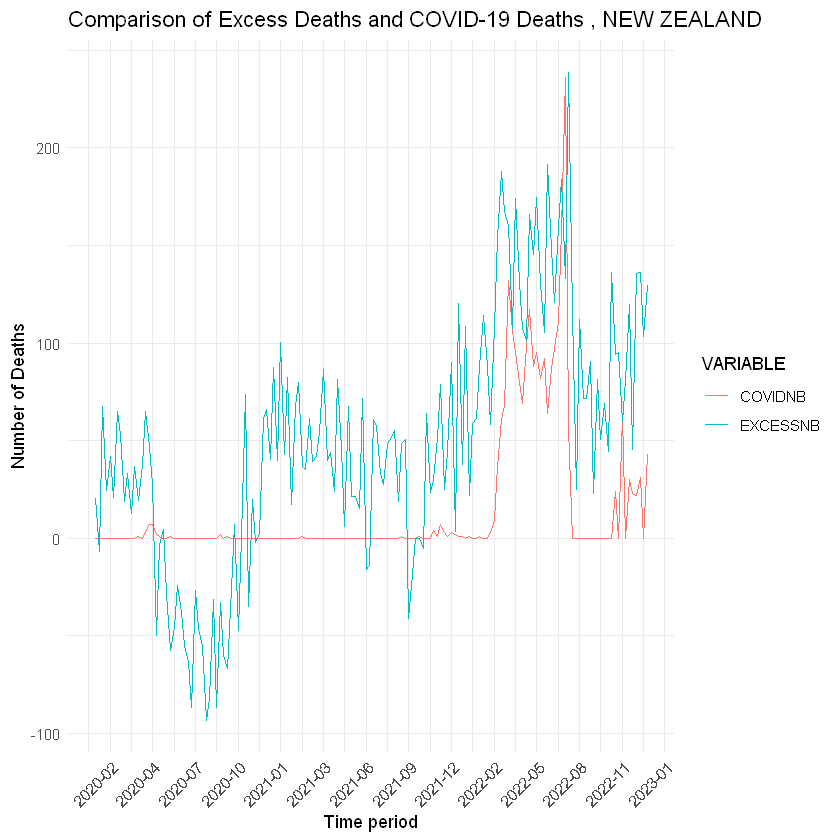

In [17]:

NZDF$Date <- as.Date(paste(NZDF$YEAR, NZDF$WEEK, "1", sep="-"), format="%Y-%U-%u")

filtered_data <- NZDF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020)
plot1 <- ggplot(filtered_data, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths , NEW ZEALAND",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "12 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

plot1


# ALSO plot all cause mortality, excess deaths and covid19 deaths 

In [18]:

all_mortality <- NZDF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB" | VARIABLE == "ALLCAUNB"))
plot2 <- ggplot(all_mortality, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of,ALL cause mortality, Excess Deaths and COVID-19 Deaths , NEW ZEALAND",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Convert ggplot to plotly
#plot2 <- ggplotly(plot2)

#plot2

Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."


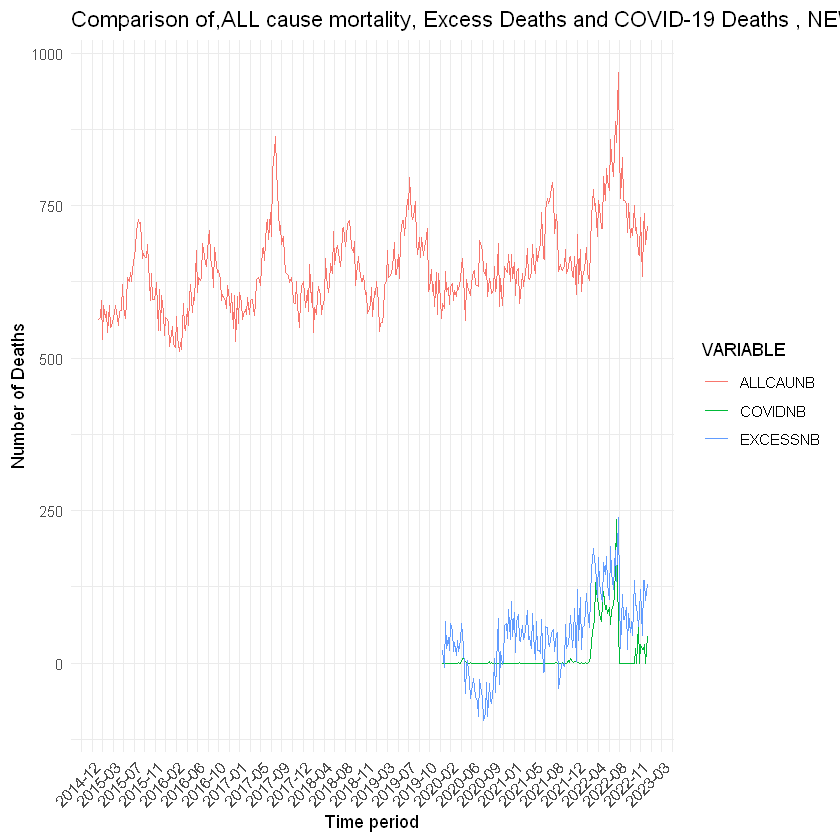

In [19]:

plot2

In New Zealand, we can see a clear pattern in all-cause mortality .  It starts to rise around March, reaching its peak in August or September, and gradually decreases by November."
From the end of 2019 to early 2021, all-cause mortality remained almost flat. If we observe excess deaths during this period, they were negative, indicating a reduction. This corresponds to the period of the COVID-19 pandemic.

# winter mortality ?




In [71]:
#install.packages("IRdisplay")


Warning message:
"package 'IRdisplay' is in use and will not be installed"


In [64]:
library(IRdisplay)

display_html('<a href="https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-7-263">Click here</a> to visit Example website.')


Warning message:
"package 'IRdisplay' was built under R version 4.3.2"


Click here to visit Example website.

# let's do for AUSTRALIA 

In [10]:
AUSDF <- df %>% 
 filter(COUNTRY == "AUS")

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message:
"Removed 4 rows containing missing values (`geom_line()`)."


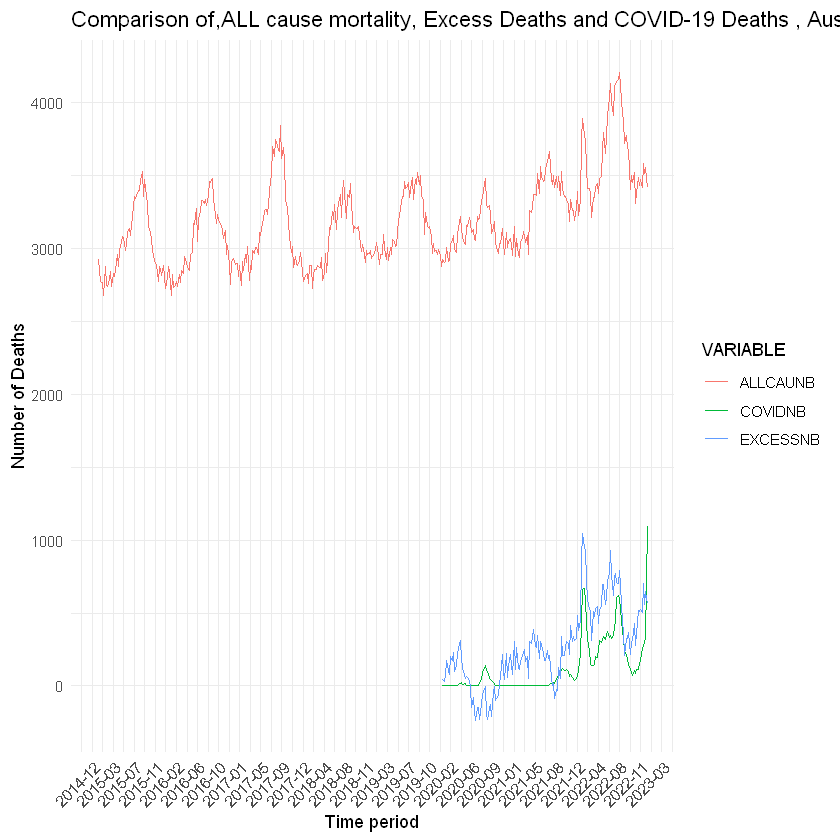

In [11]:
AUSDF$Date <- as.Date(paste(AUSDF$YEAR, AUSDF$WEEK, "1", sep="-"), format="%Y-%U-%u")
all_mortality_AUS <- AUSDF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB" | VARIABLE == "ALLCAUNB"))
plot3 <- ggplot(all_mortality_AUS, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of,ALL cause mortality, Excess Deaths and COVID-19 Deaths , Australia",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Convert ggplot to plotly
#plot3 <- ggplotly(plot3)

plot3

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


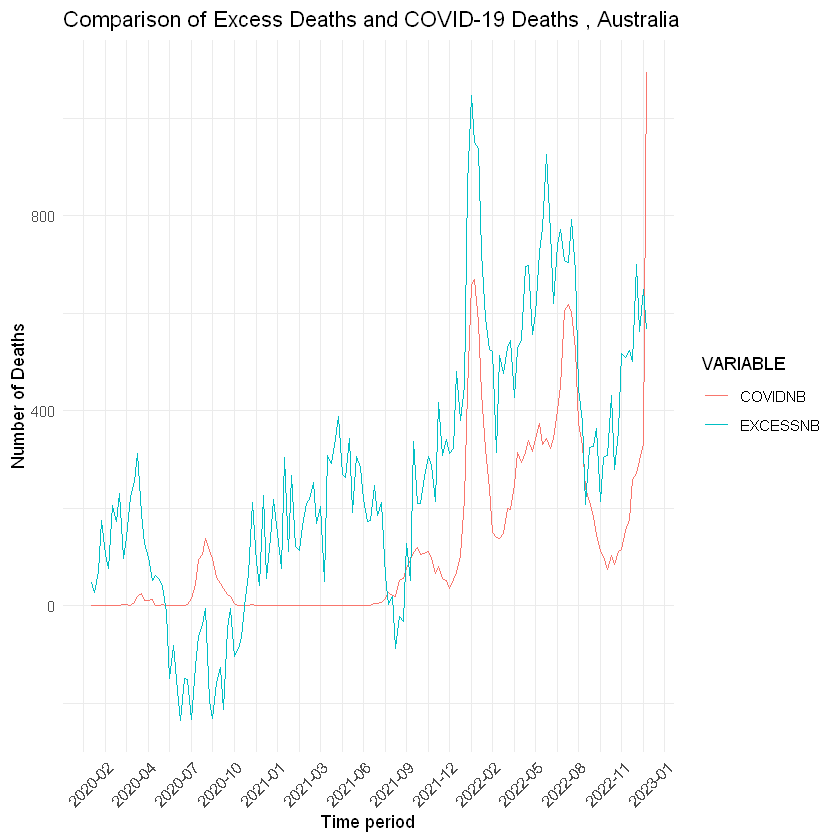

In [17]:
filtered_data <- AUSDF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020)
plot4 <- ggplot(filtered_data, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths , Australia",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "12 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Convert ggplot to plotly
#plot4 <- ggplotly(plot4)

plot4

# for United States 

In [13]:
USADF <- df %>% 
 filter(COUNTRY == "USA")

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


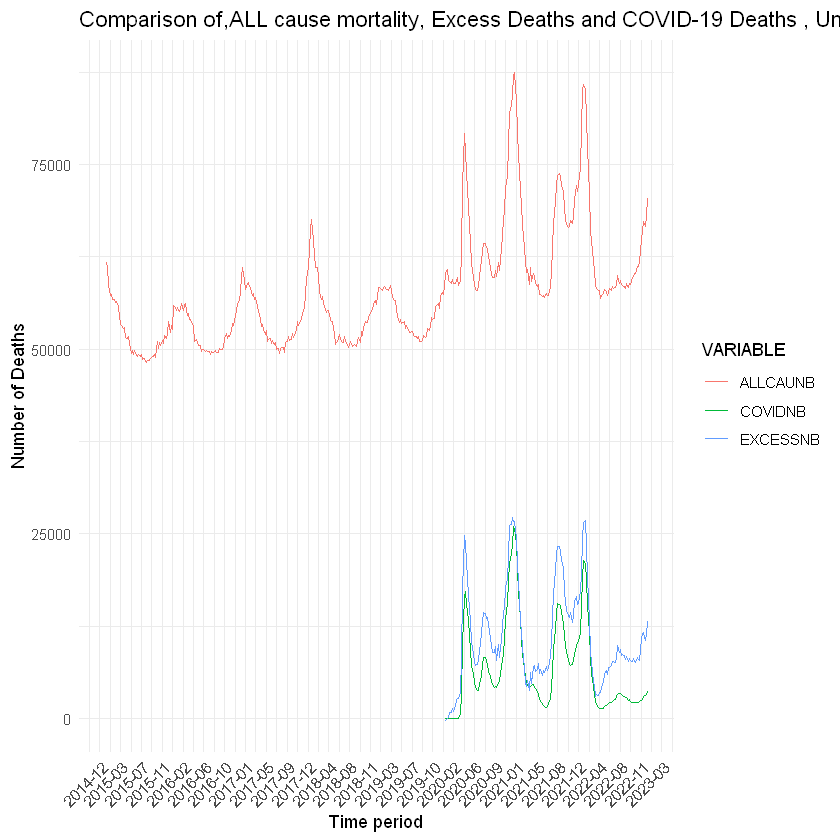

In [14]:
USADF$Date <- as.Date(paste(USADF$YEAR, USADF$WEEK, "1", sep="-"), format="%Y-%U-%u")
all_mortality_USA <- USADF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB" | VARIABLE == "ALLCAUNB"))
plot5 <- ggplot(all_mortality_USA, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of,ALL cause mortality, Excess Deaths and COVID-19 Deaths , United states",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Convert ggplot to plotly
#plot5 <- ggplotly(plot5)

plot5

In the USA, all-cause mortality began to rise around October, reaching its peak in January and February, and then started to decline, reaching a low point in May and June. Excess deaths have consistently been high or positive in the USA. After the onset of COVID, mortality rose significantly higher compared to previous years.

# SWEDEN

In [15]:
SWEDF <- df %>% 
 filter(Country == "Sweden")

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


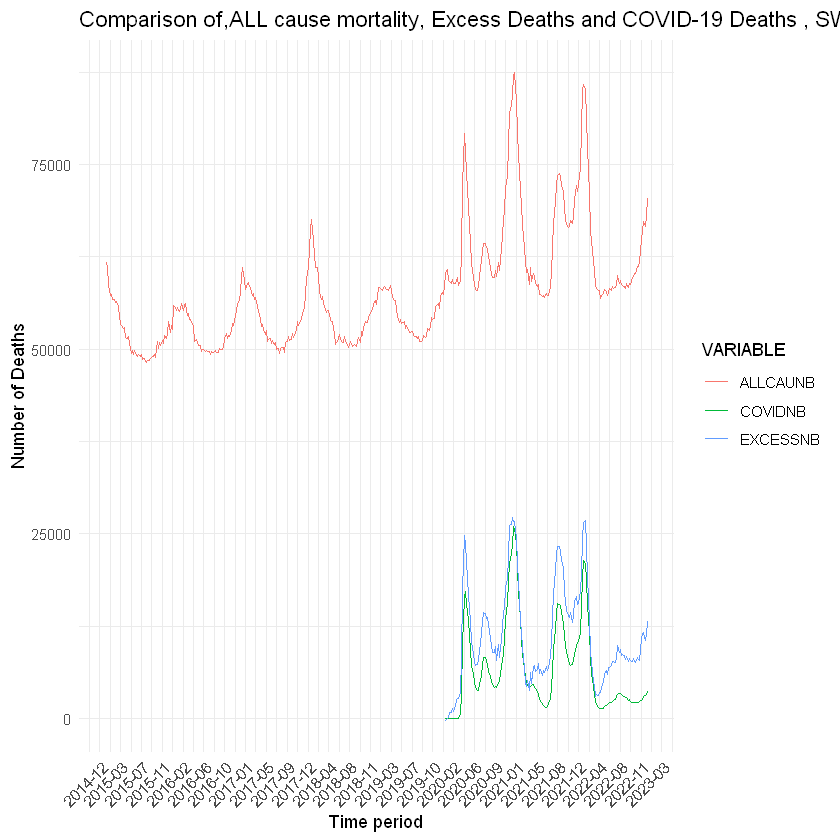

In [16]:
SWEDF$Date <- as.Date(paste(SWEDF$YEAR, SWEDF$WEEK, "1", sep="-"), format="%Y-%U-%u")
all_mortality_SWE <- USADF %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB" | VARIABLE == "ALLCAUNB"))
plot_swe <- ggplot(all_mortality_SWE, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of,ALL cause mortality, Excess Deaths and COVID-19 Deaths , SWEDEN",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

# Convert ggplot to plotly
#plot_swe <- ggplotly(plot_swe)

plot_swe

During the COVID-19 pandemic, Sweden was among the few countries that did not enforce strict lockdown measures but instead relied more on voluntary and sustainable mitigation recommendations.

# from the continent

## Let's first find unique countries, and since we don't have the continent information in the data, we will determine the continent to which each country belongs

In [21]:
unique_countries <- unique(df$Country)
unique_countries

[1] "Australia"       "Austria"         "Belgium"         "Canada"         
 [5] "Czechia"         "Denmark"         "Finland"         "France"         
 [9] "Germany"         "Greece"          "Hungary"         "Iceland"        
[13] "Italy"           "Luxembourg"      "Netherlands"     "New Zealand"    
[17] "Norway"          "Poland"          "Portugal"        "Slovak Republic"
[21] "Spain"           "Sweden"          "Switzerland"     "United Kingdom" 
[25] "United States"   "Chile"           "Estonia"         "Israel"         
[29] "Latvia"          "Lithuania"       "Slovenia"        "Mexico"         
[33] "Ireland"         "Japan"           "Korea"           "Colombia"       
[37] "Türkiye"         "Costa Rica"

In [22]:
unique_countries_df <- data.frame(C= unique(df$Country))
unique_countries_df

C
<chr>
Australia
Austria
Belgium
Canada
Czechia
Denmark
Finland
France
Germany


In [81]:
#install.packages("countrycode")
library(countrycode)

# List of countries
countries <- c("Australia", "Austria", "Belgium", "Canada", "Czechia", "Denmark", "Finland", "France",
               "Germany", "Greece", "Hungary", "Iceland", "Italy", "Luxembourg", "Netherlands",
               "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Spain", "Sweden",
               "Switzerland", "United Kingdom", "United States", "Chile", "Estonia", "Israel",
               "Latvia", "Lithuania", "Slovenia", "Mexico", "Ireland", "Japan", "Korea", "Colombia",
               "Türkiye", "Costa Rica")

# Get continent names
continents <- countrycode(countries, origin = "country.name", destination = "continent")

# Print the result
continent_list = data.frame(Country = countries, Continent = continents)
continent_list

Warning message:
"package 'countrycode' was built under R version 4.3.2"


Country,Continent
<chr>,<chr>
Australia,Oceania
Austria,Europe
Belgium,Europe
Canada,Americas
Czechia,Europe
Denmark,Europe
Finland,Europe
France,Europe
Germany,Europe


As the country code package will not determine whether it is South or North America, it will only show "Americas." I am going to add "North" and "South" manually for the continent "Americas."

In [ ]:

#write.csv(continent_list, "continent_list.csv", row.names = FALSE)

### updated continent data

In [18]:
continent_data = read.csv("continent_list_update.csv")
continent_data

Country,Continent
<chr>,<chr>
Australia,Oceania
Austria,Europe
Belgium,Europe
Canada,North America
Czechia,Europe
Denmark,Europe
Finland,Europe
France,Europe
Germany,Europe


## Join the continent data to our main dataframe (df) to plot only the data for each continent.

# oceania

In [19]:
joined_data <- df %>%
  left_join(continent_data, by = "Country") 

In [20]:
joined_data$Date <- as.Date(paste(joined_data$YEAR, joined_data$WEEK, "1", sep="-"), format="%Y-%U-%u")

filtered_data_oceania <- joined_data %>%
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "Oceania")

# Create ggplot object with facet_wrap
Oceania<- ggplot(filtered_data_oceania, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths in Oceania",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Country, scales = "free_y",ncol = 2, nrow = 2)  # Create separate plots for each country



Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x,

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x,

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


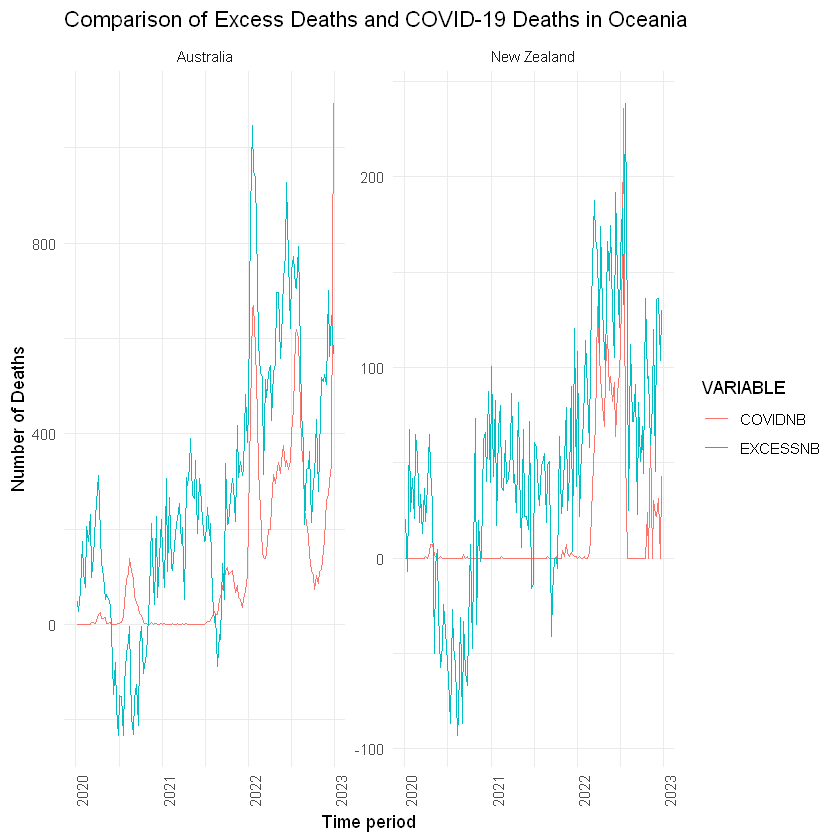

In [21]:
#Oceania = ggplotly(Oceania)
Oceania

#
#
As we can see a reduction in excess deaths in 2020, which corresponds to the COVID period, particularly during the winter period when we historically witness higher mortality rates, the excess deaths remained lower. This decline may be attributed to strategies employed, such as closing borders, implementing lockdowns, and practicing social distancing, which helped prevent influenza and other respiratory illnesses. Additionally, other factors, like potentially fewer deaths from accidents, work-related incidents, and air pollution, may have played a role in reducing the overall number of deaths.

# South America

In [22]:
filtered_data_SA <- joined_data %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "South America")

# Create ggplot object with facet_wrap
South_America<- ggplot(filtered_data_SA, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths in South America",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Country, scales = "free_y",ncol = 2, nrow = 2)  # Create separate plots for each country



Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


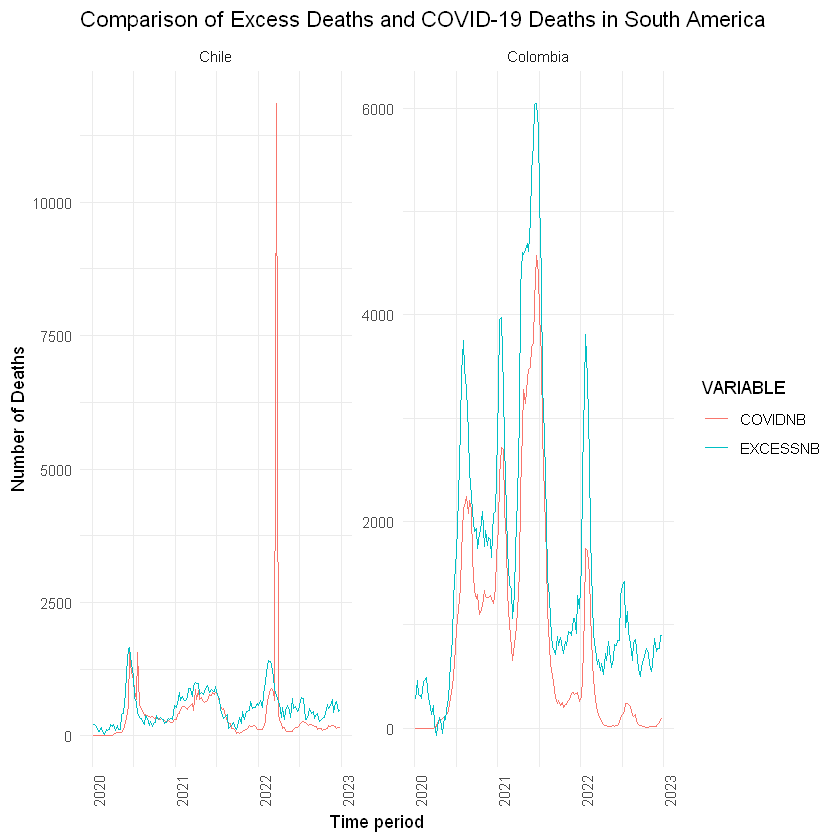

In [23]:
#South_America = ggplotly(South_America)
South_America

# North America

In [24]:
filtered_data_NA <- joined_data %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "North America")

# Create ggplot object with facet_wrap
North_America<- ggplot(filtered_data_NA, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths in North America",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Country, scales = "free_y",ncol = 2, nrow = 2)  # Create separate plots for each country


Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


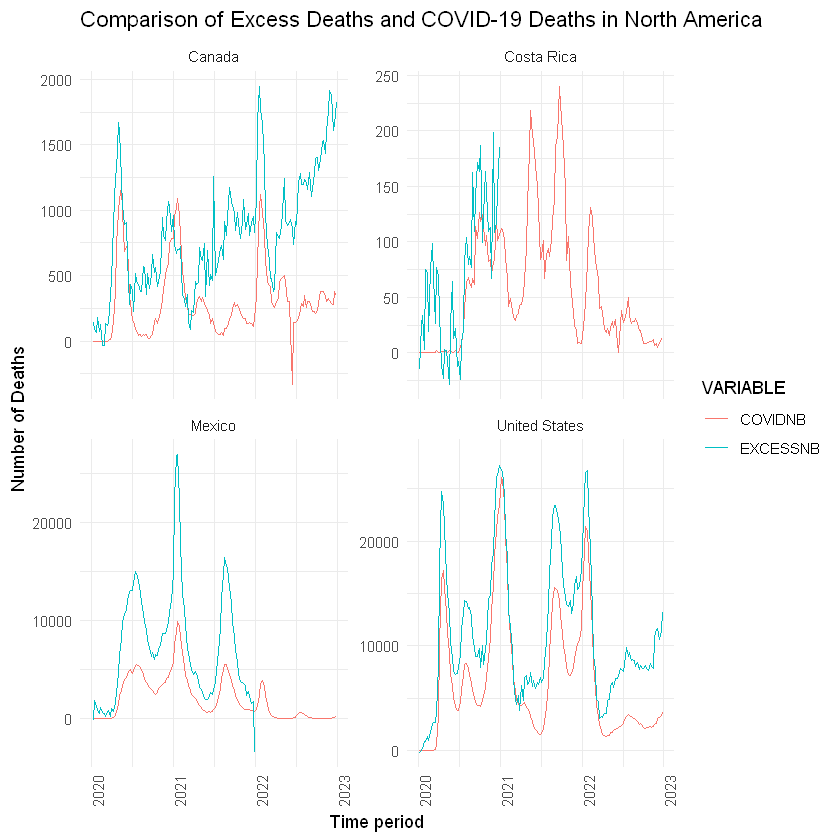

In [25]:
#North_America = ggplotly(North_America)
North_America

# Europe

In [26]:
# Filter the data for the relevant variables and continent
filtered_data_Europe <- joined_data %>% 
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "Europe")

# Create ggplot object with facet_wrap
europe <- ggplot(filtered_data_Europe, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths in Europe",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Country, scales = "free_y",ncol = 5, nrow = 6)  # Create separate plots for each country


Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


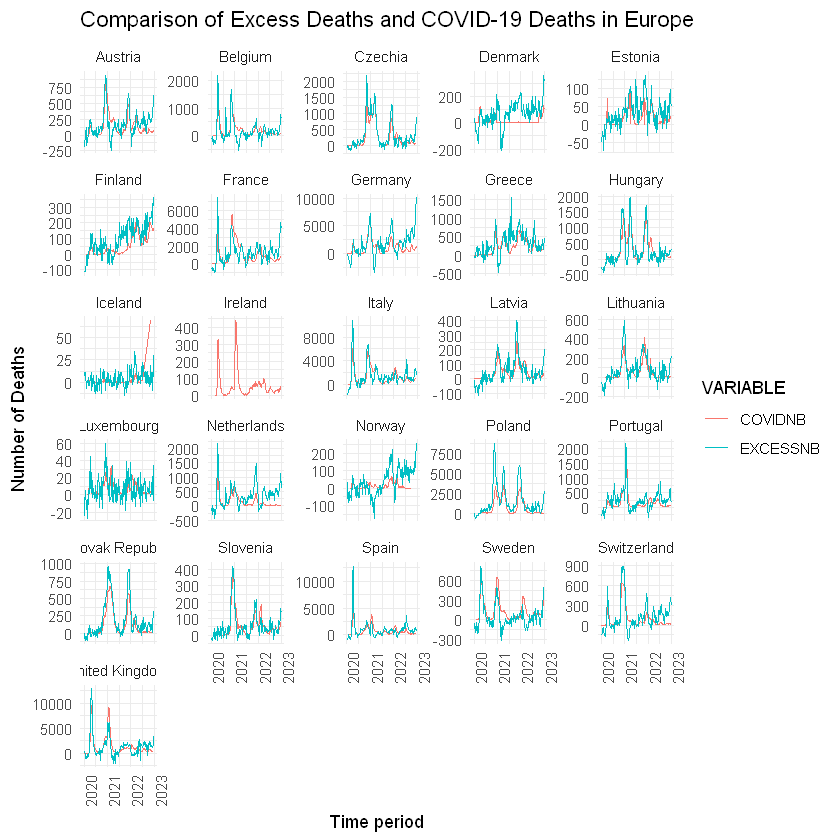

In [27]:
#europe_plot = ggplotly(europe)
europe

## It's hard to read when multiple plots are displayed at once. Let's plot them one by one for better readability."

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


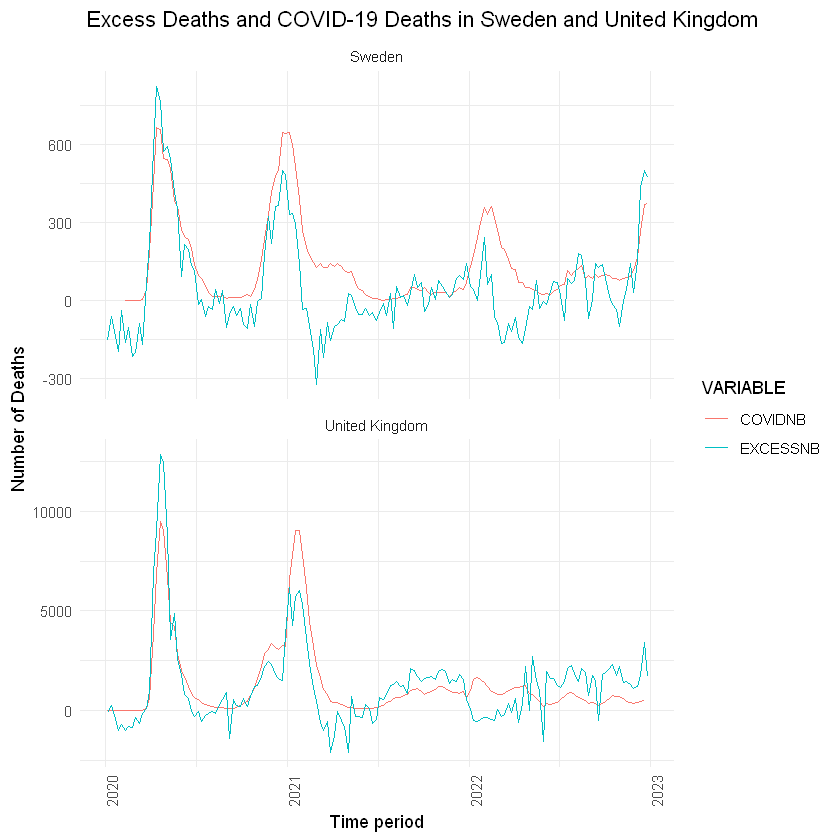

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


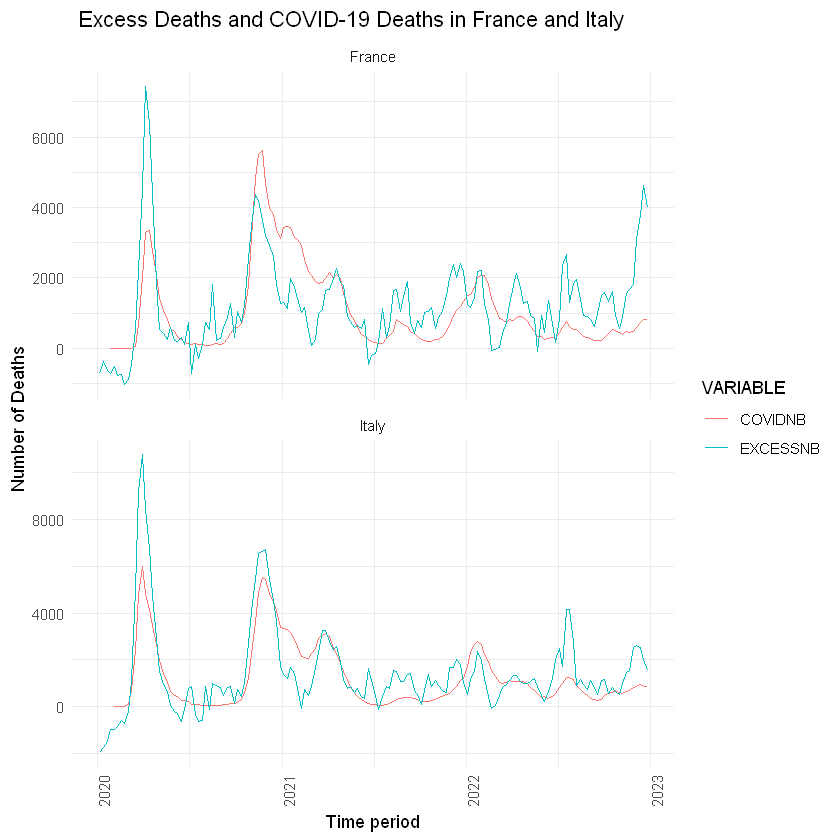

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


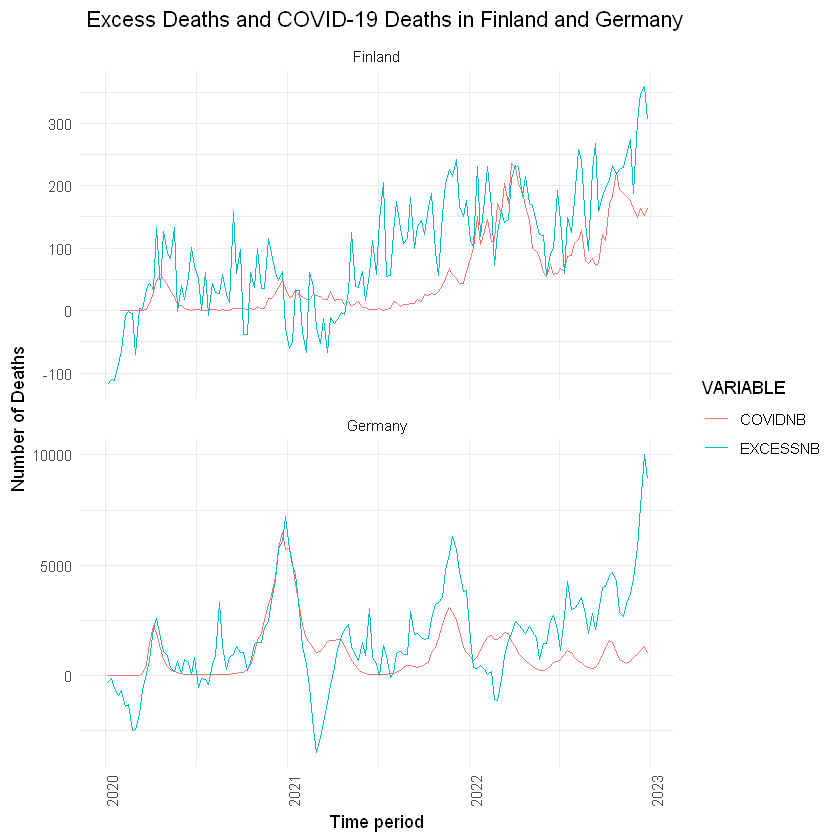

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


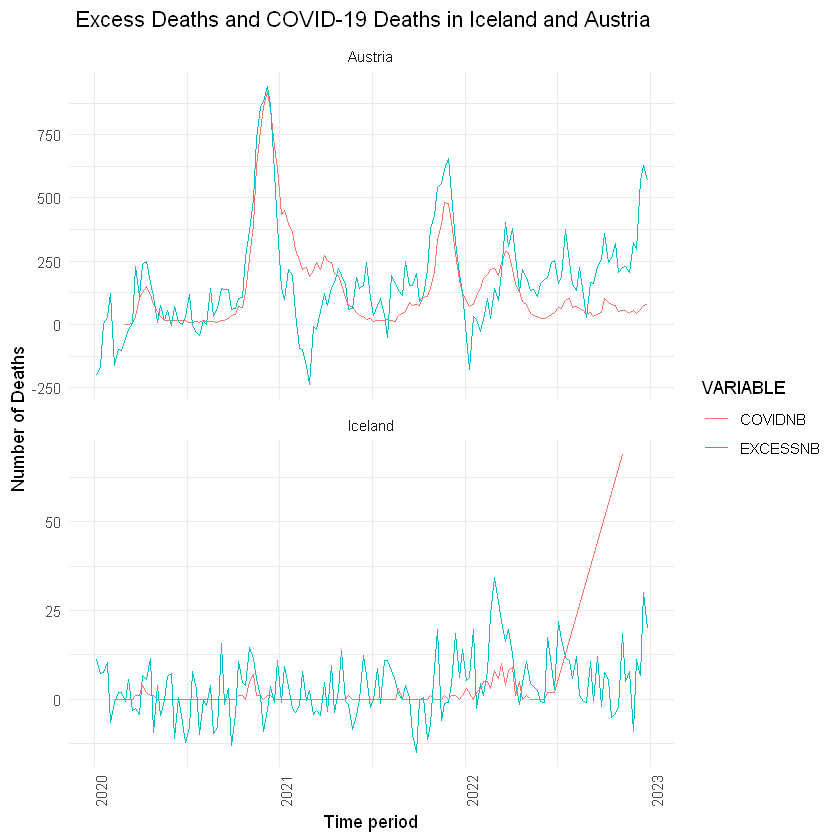

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


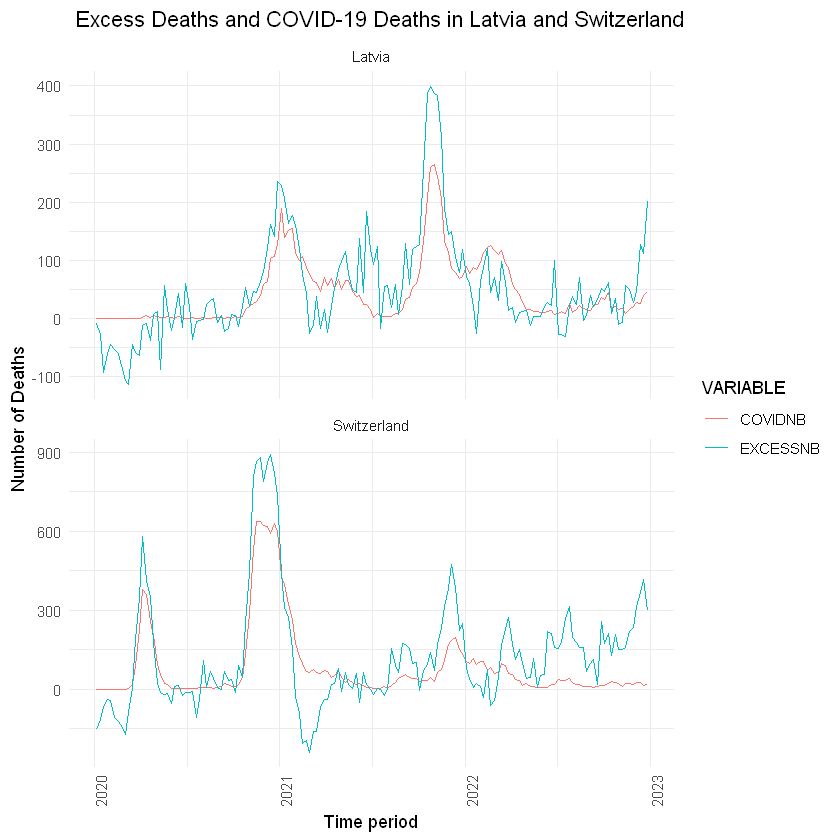

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


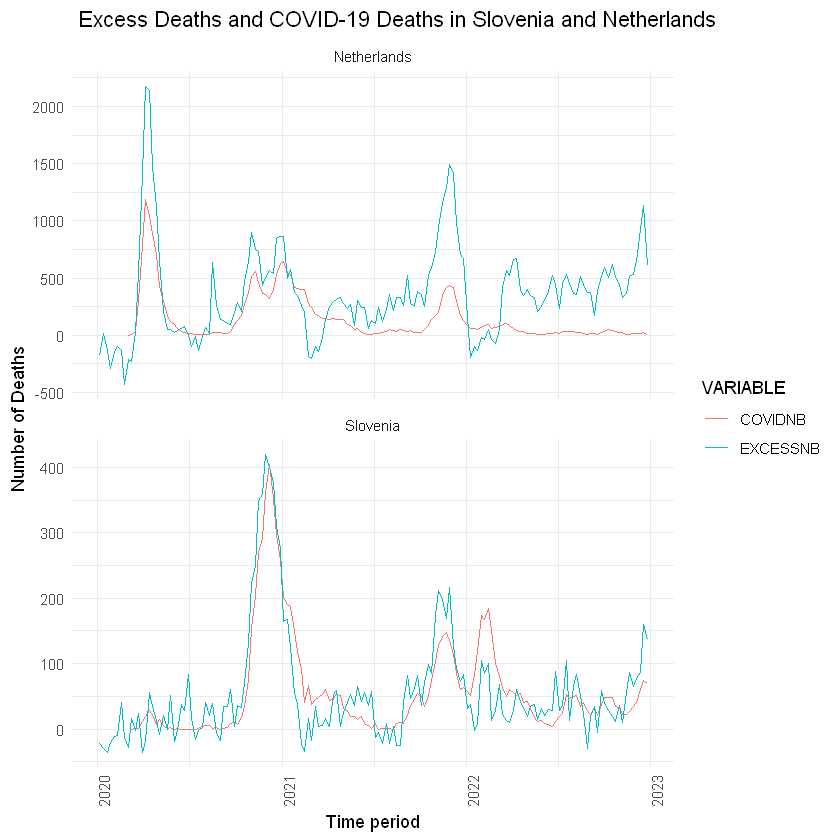

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


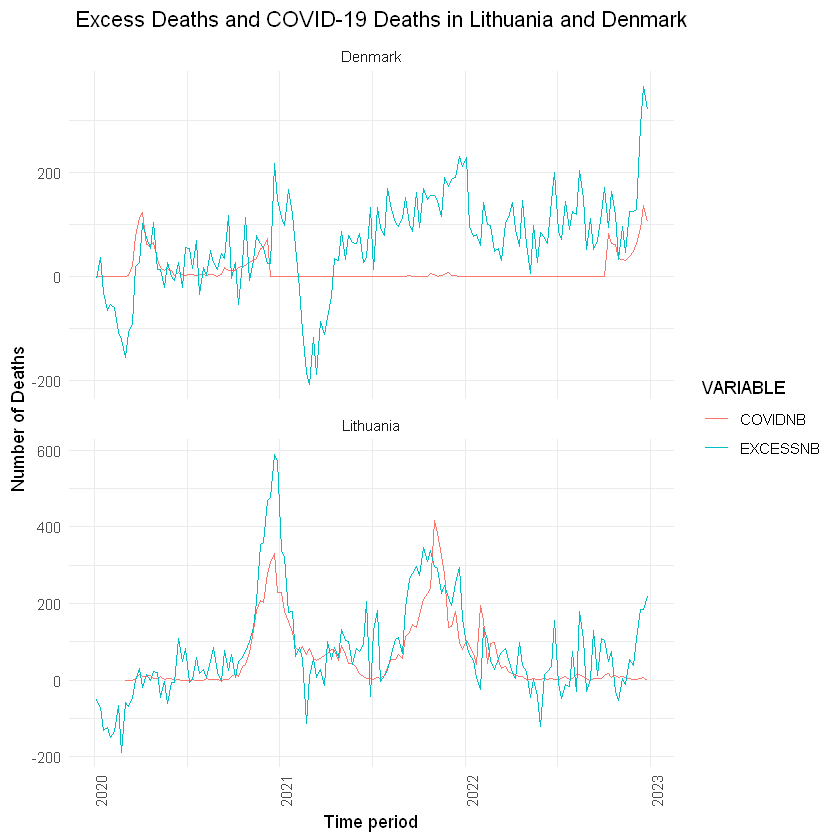

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


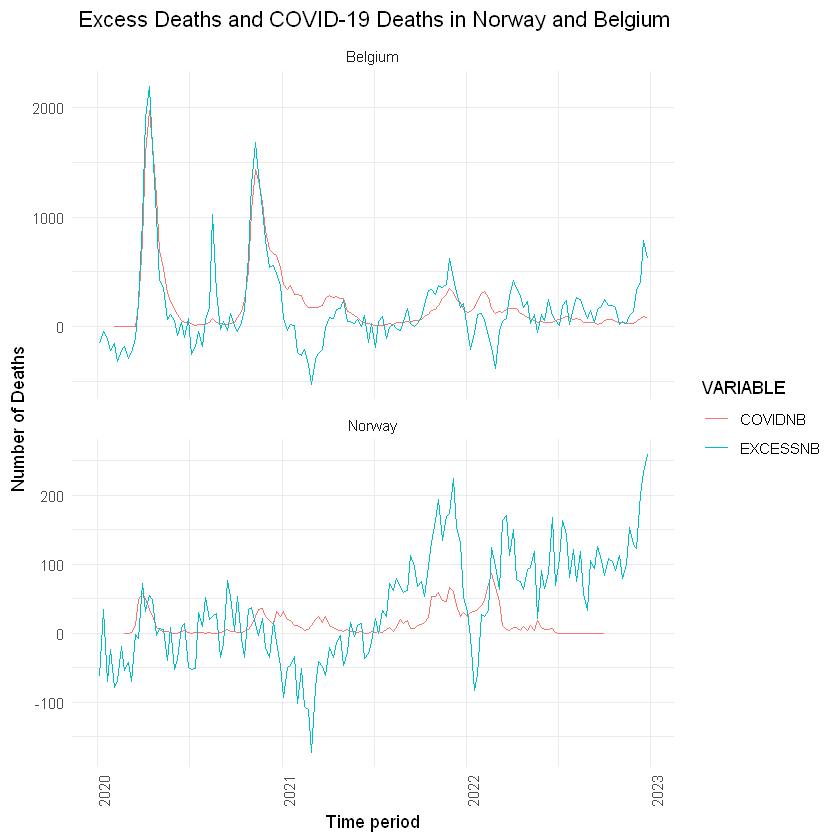

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


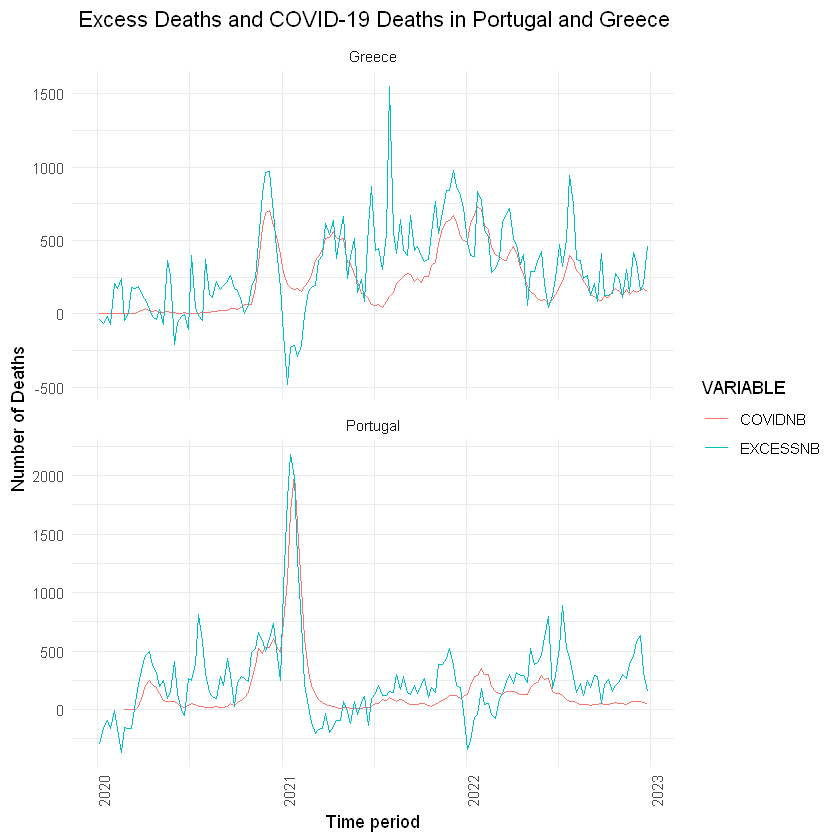

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


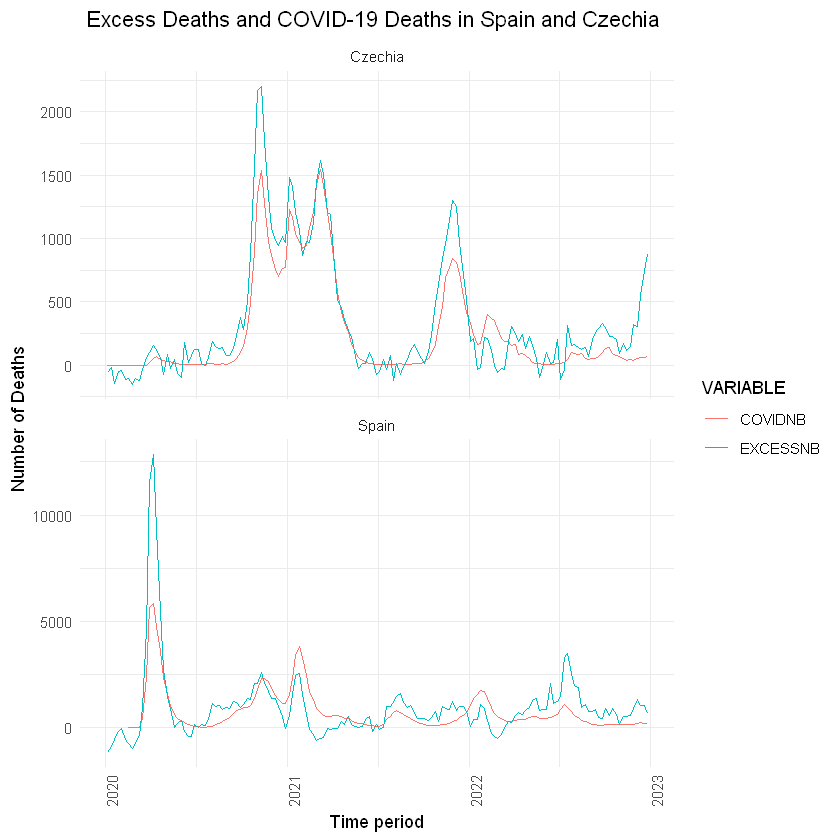

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


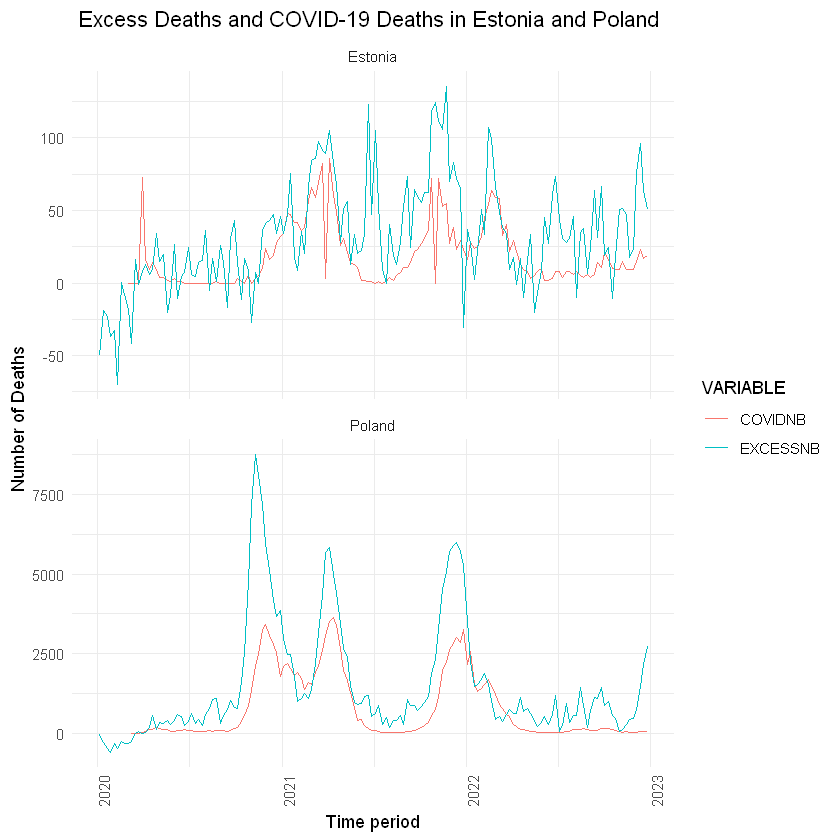

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


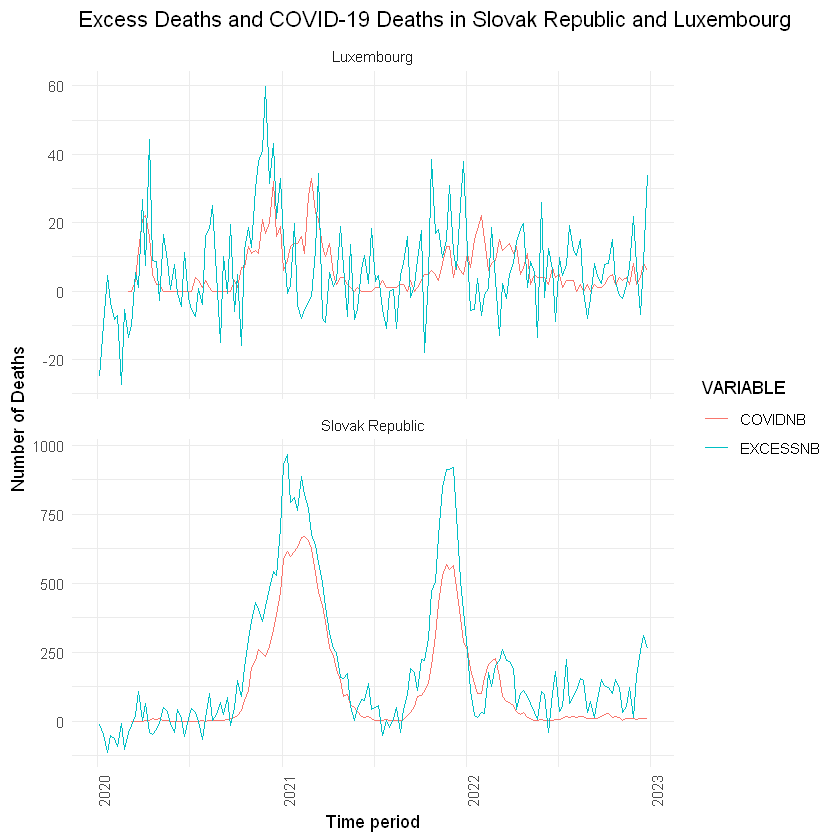

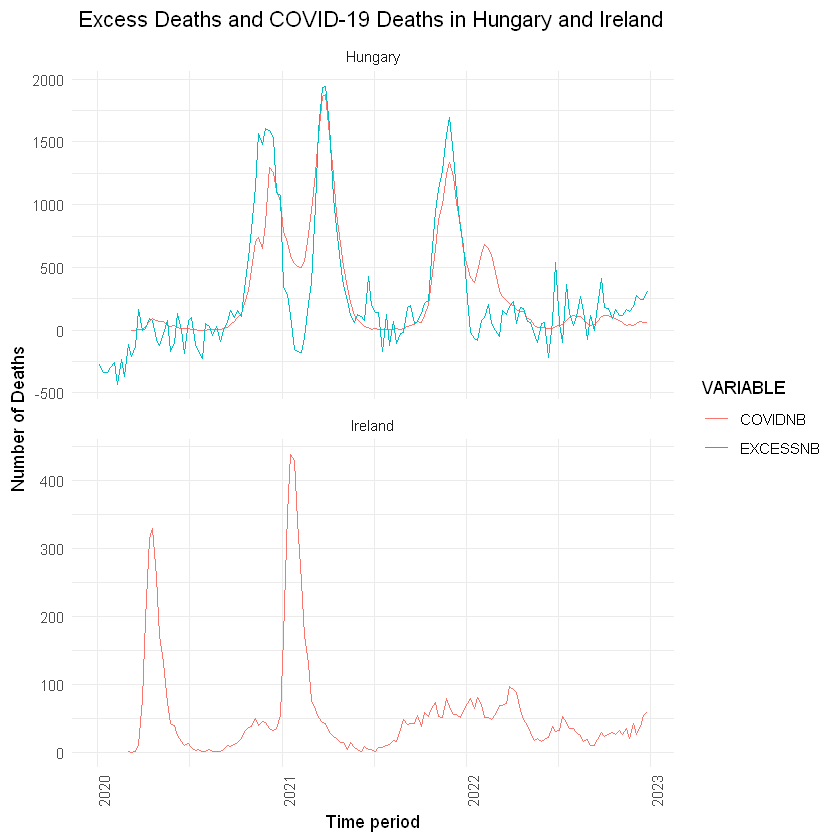

In [28]:

filtered_data_Europe <- joined_data %>%
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "Europe")

unique_countries <- unique(filtered_data_Europe$Country)

# Create ggplot objects with facet_wrap for each pair of countries
for (i in seq(1, length(unique_countries), by = 2)) {
  countries_subset <- unique_countries[i:(i + 1)]
  subset_data <- filtered_data_Europe %>% filter(Country %in% countries_subset)
  
  plot_europe <- ggplot(subset_data, aes(x = Date, y = Value, color = VARIABLE)) +
    geom_line() +
    labs(title = paste(" Excess Deaths and COVID-19 Deaths in", paste(countries_subset, collapse = " and ")),
         x = "Time period",
         y = "Number of Deaths") +
    scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(~Country, scales = "free_y", ncol = 1)
  
  print(plot_europe)
}


# Asia

In [29]:
filtered_data_asia<- joined_data %>%
  filter((VARIABLE == "EXCESSNB" | VARIABLE == "COVIDNB") & YEAR >= 2020 & Continent == "Asia")

# Create ggplot object with facet_wrap
Asia<- ggplot(filtered_data_asia, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  labs(title = "Comparison of Excess Deaths and COVID-19 Deaths in Asia",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~Country, scales = "free_y",ncol = 2, nrow = 2)  


Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


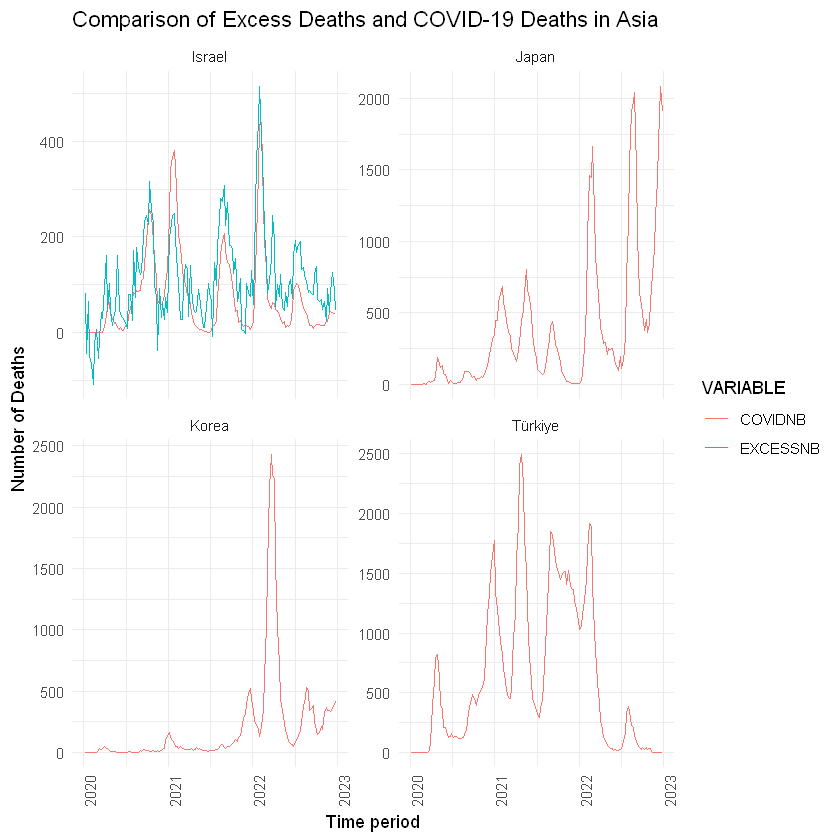

In [30]:
#Asia = ggplotly(Asia)
Asia

Limitations: There is no data available for excess deaths for Korea, Japan, and Turkey.

Additional Work: Do we need to calculate this ourselves?
     or we can get data from (https://github.com/TheEconomist/covid-19-excess-deaths-tracker/tree/master/output-data/excess-deaths)

# All cause mortality 

In [31]:

df$Date <- as.Date(paste(df$YEAR, df$WEEK, "1", sep="-"), format="%Y-%U-%u")

# Filter the data for the relevant variable and years
filtered_allcause <- df %>% 
  filter(VARIABLE == "ALLCAUNB" & YEAR >= 2015 & YEAR <= 2022)


# Create ggplot object
allplot2 <- ggplot(filtered_allcause, aes(x = Date, y = Value, color = COUNTRY)) +
  geom_line() +
  labs(title = "All-cause Deaths (2015-2022)",
       x = "Year",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", color = "black") 




Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x,

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x,

Warning message:
"Removed 69 rows containing missing values (`geom_line()`)."


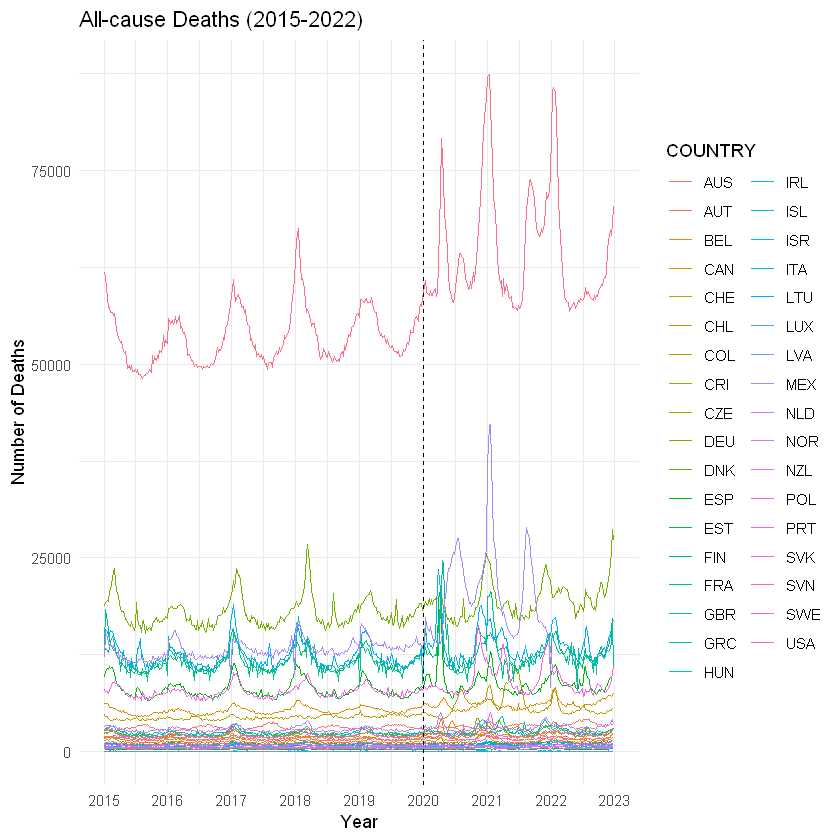

In [32]:

#allplot2 <- ggplotly(allplot2)
allplot2

It is challenging to compare when each country has a different population, leading to varying mortality rates based on the country's population density. How can we make meaningful comparisons in this case?"

 we might consider normalizing the data .

## what is the pattern of mortality in  CANADA

In [33]:

filtered_allcause1 <- df %>% 
  filter(VARIABLE == "ALLCAUNB" & YEAR >= 2015 & YEAR <= 2022 & COUNTRY %in% c( "CAN"))

# Create ggplot object
allplot3 <- ggplot(filtered_allcause1, aes(x = Date, y = Value, color = Country)) +
  geom_line() +
  labs(title = "All-cause Deaths (2015-2022)",
       x = "Year",
       y = "Number of Deaths") +
scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") + 
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +

 
  geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", color = "black")


Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


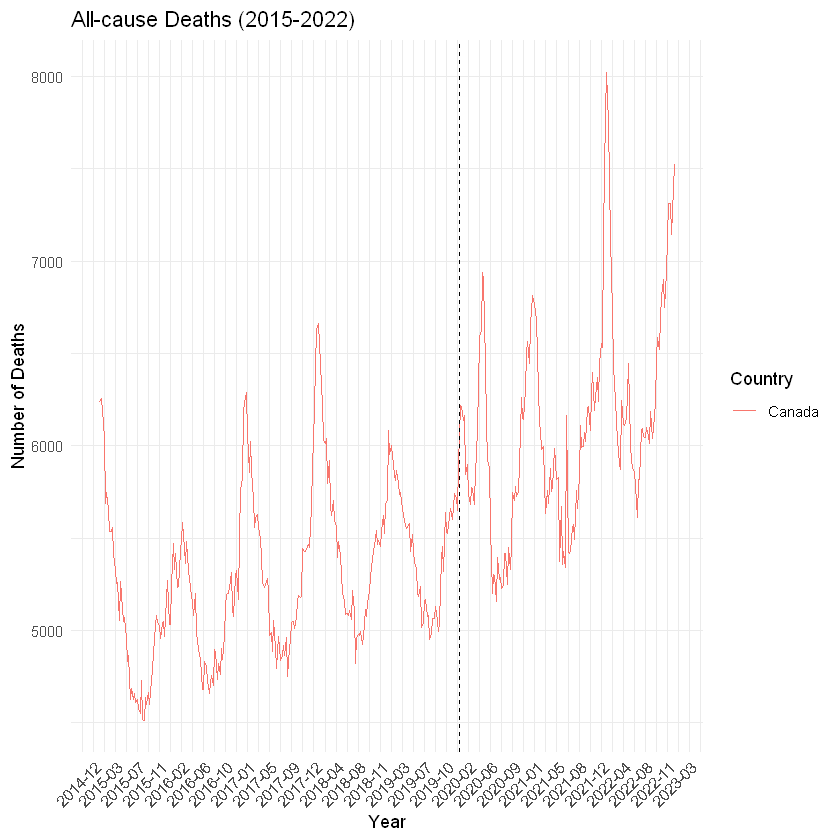

In [34]:
#allplot3 <- ggplotly(allplot3)
allplot3

# As we want to observe the patterns, let's plot the all-cause mortality country by country

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


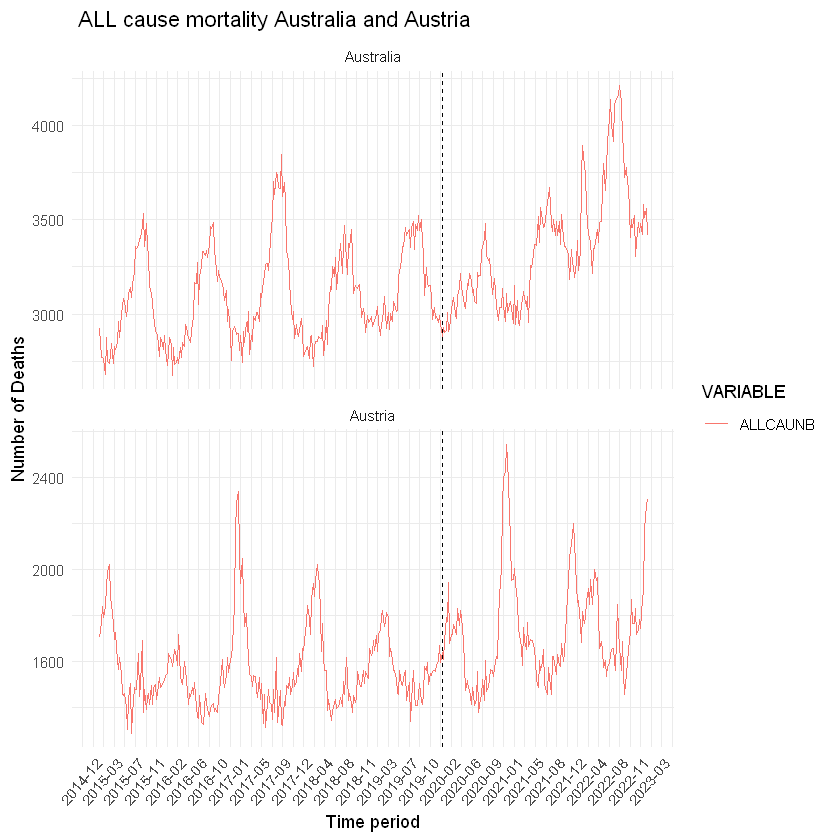

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


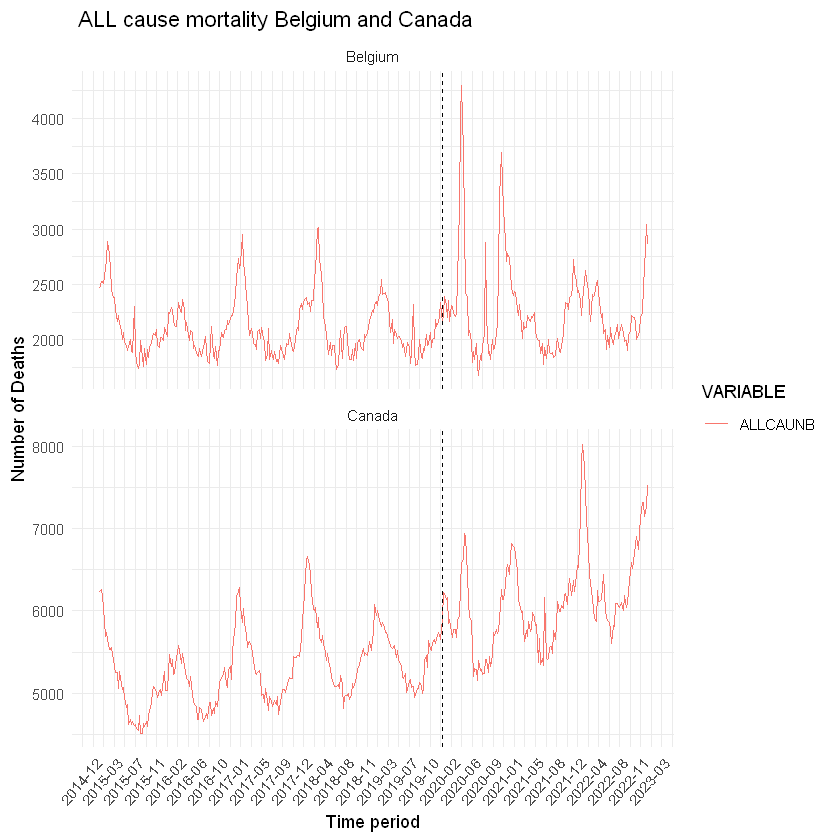

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


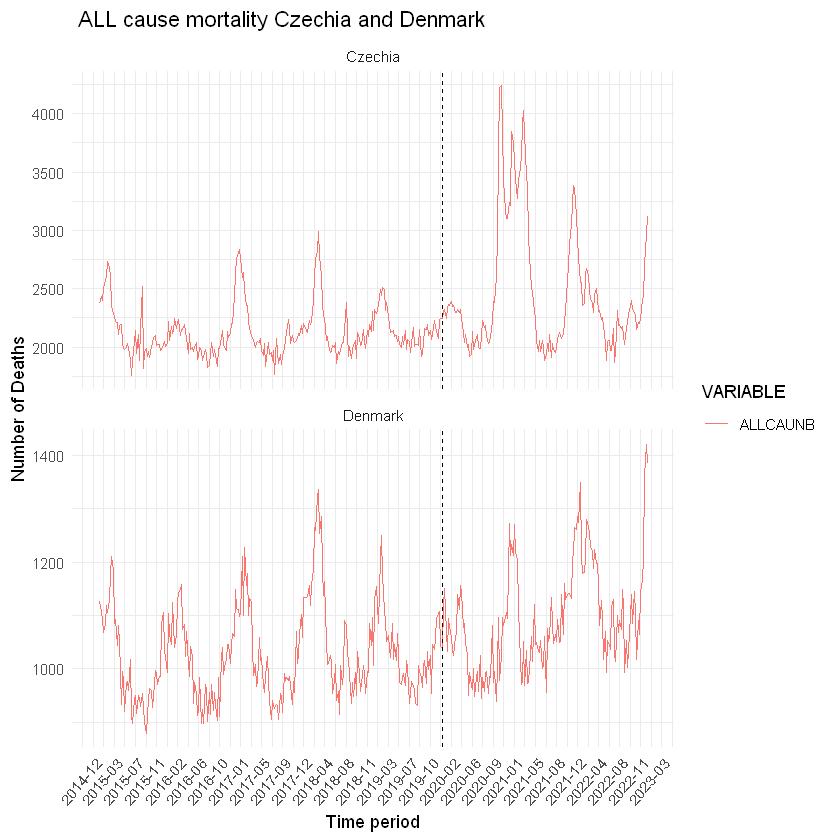

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


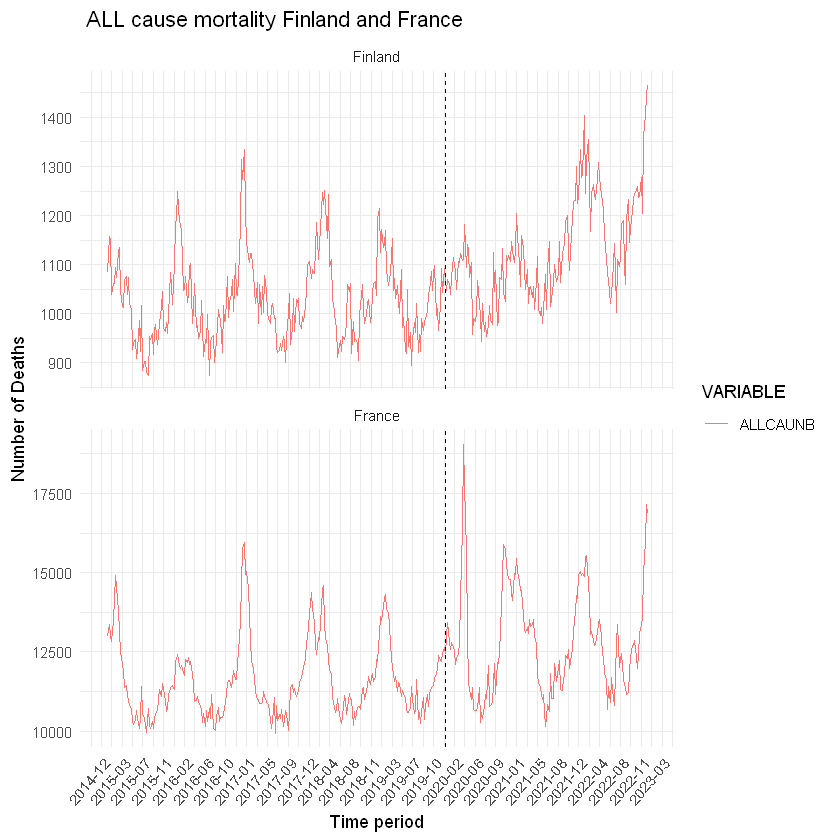

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


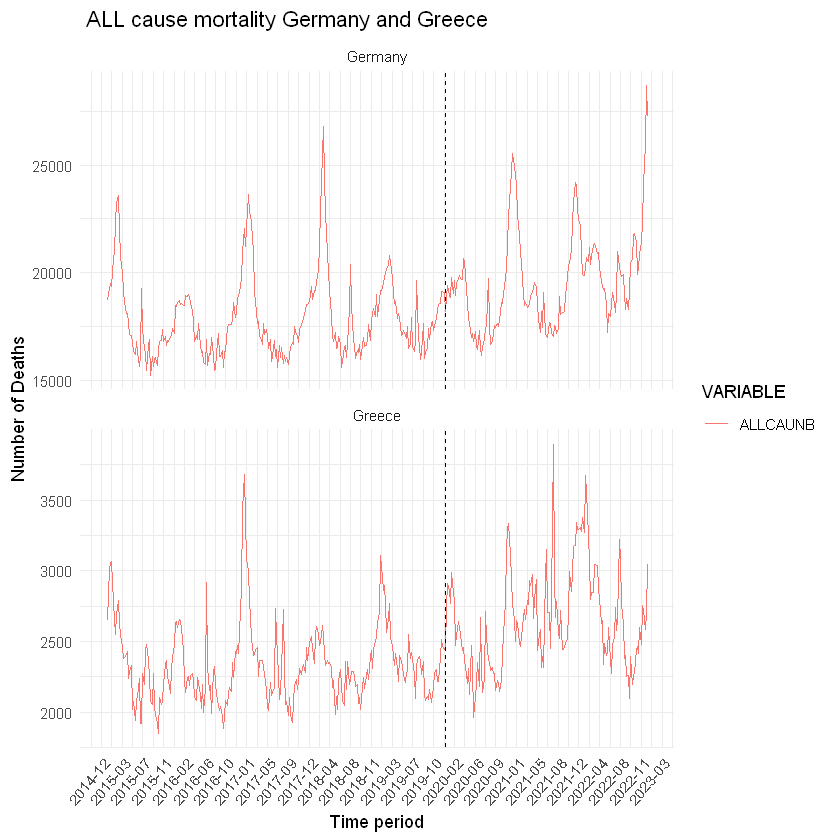

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


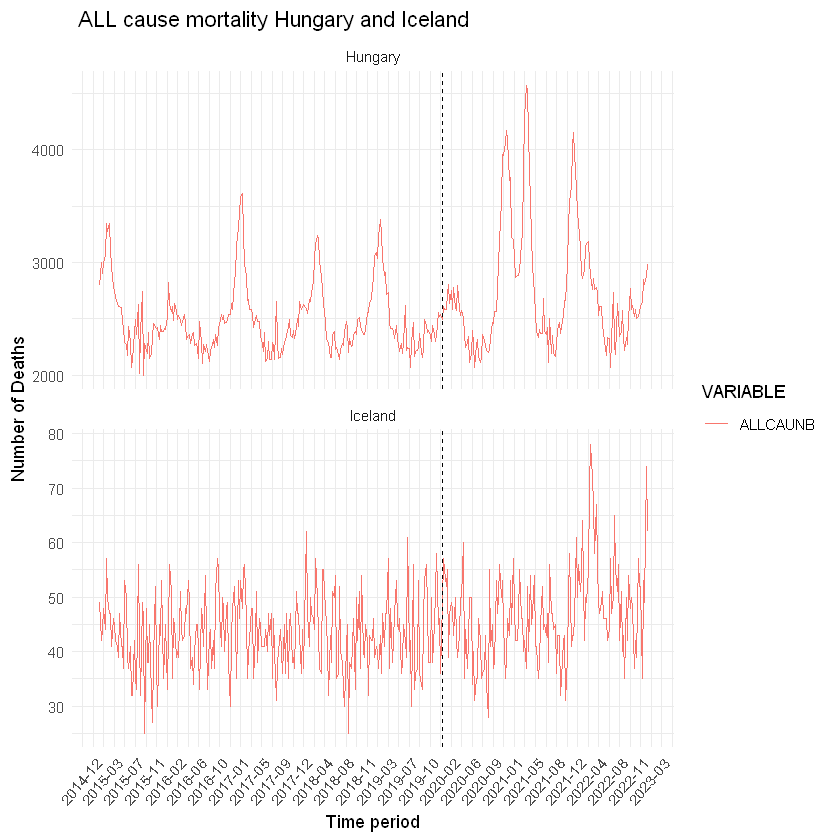

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


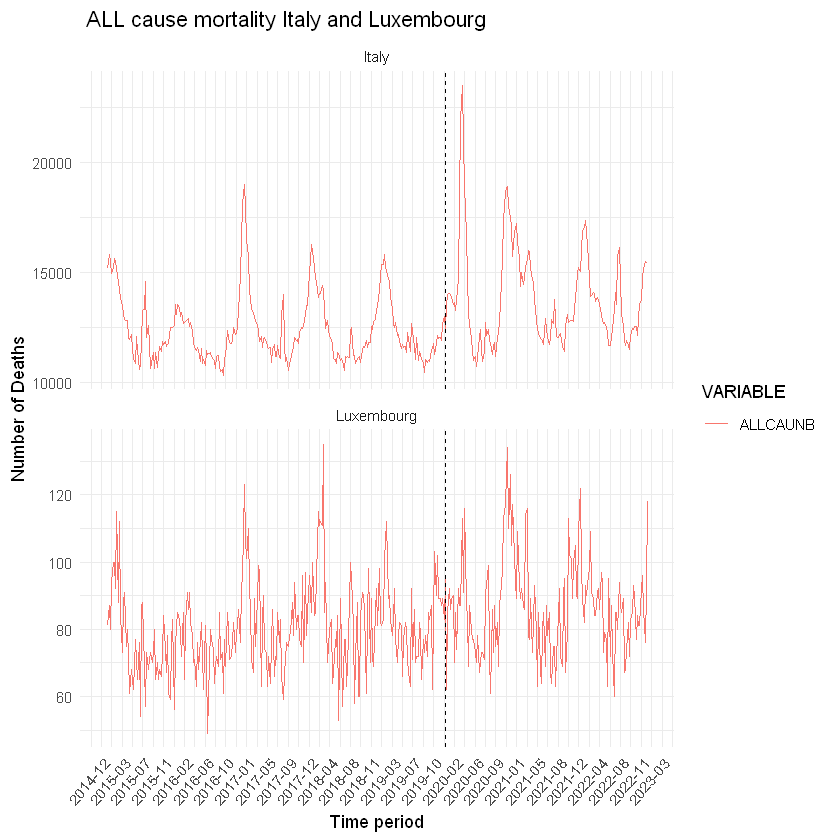

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


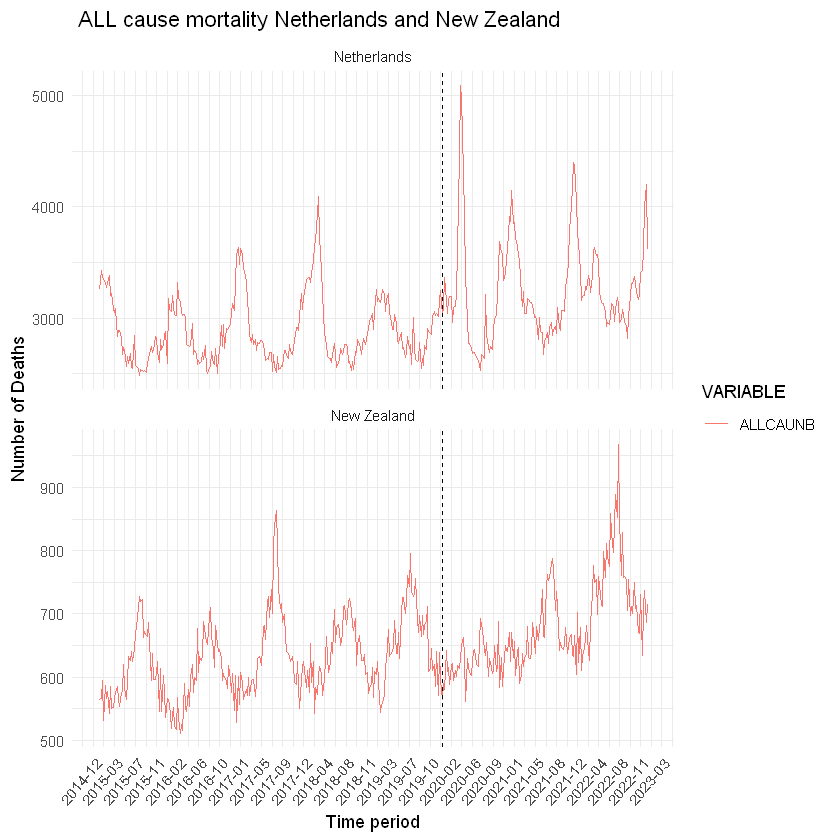

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


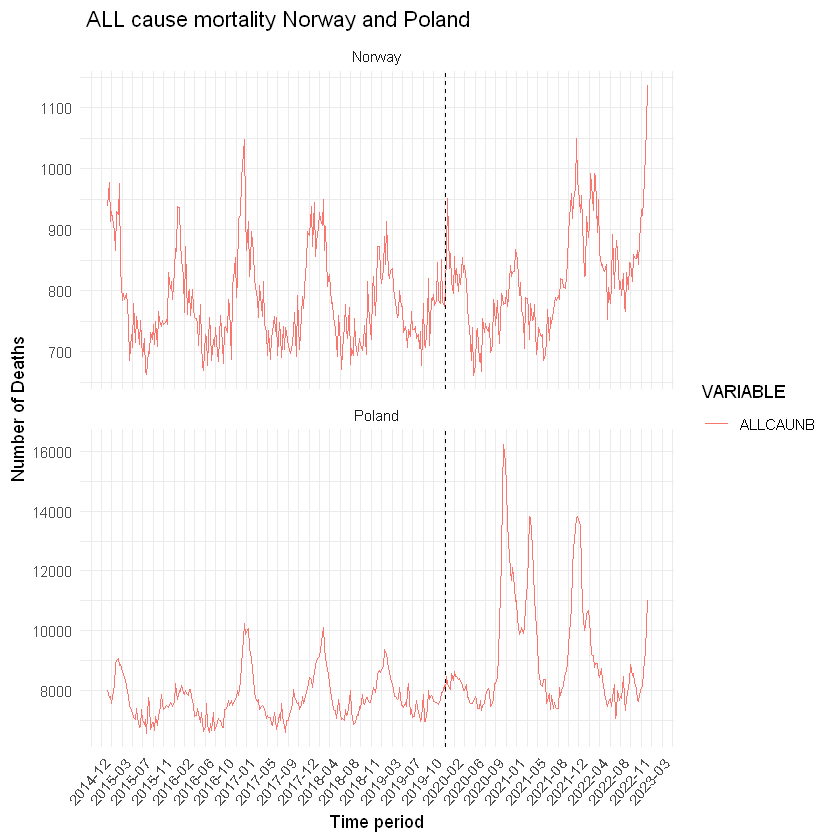

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


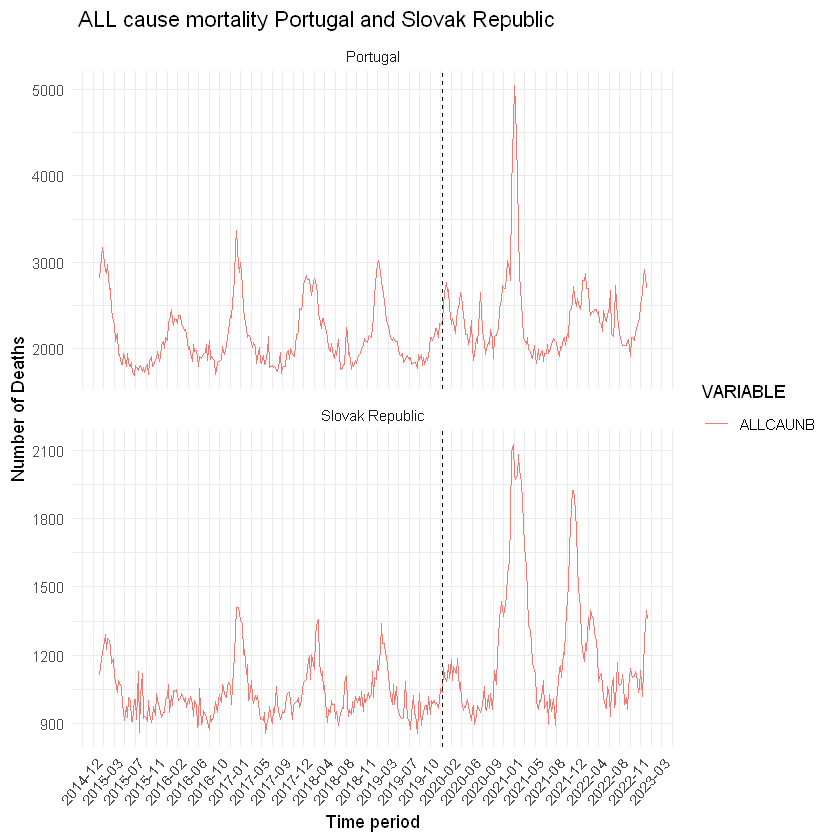

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


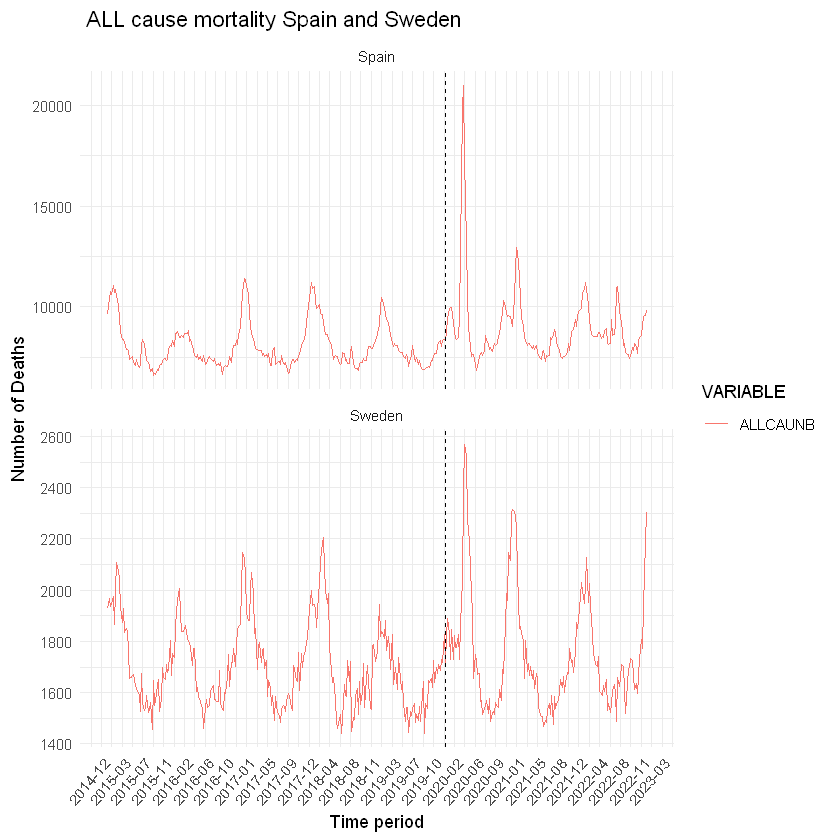

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


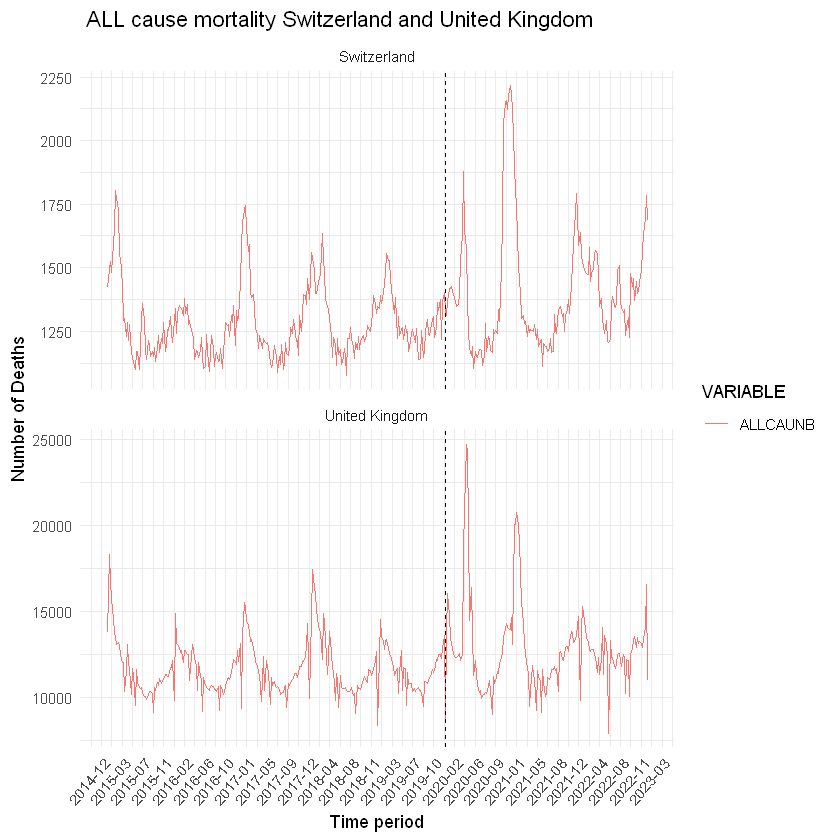

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


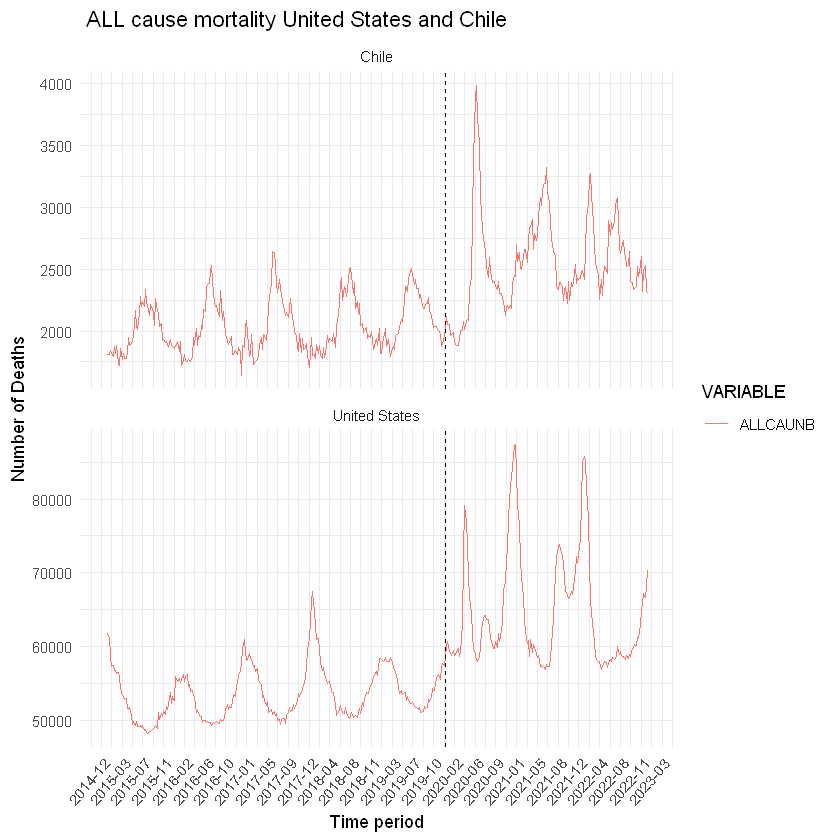

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


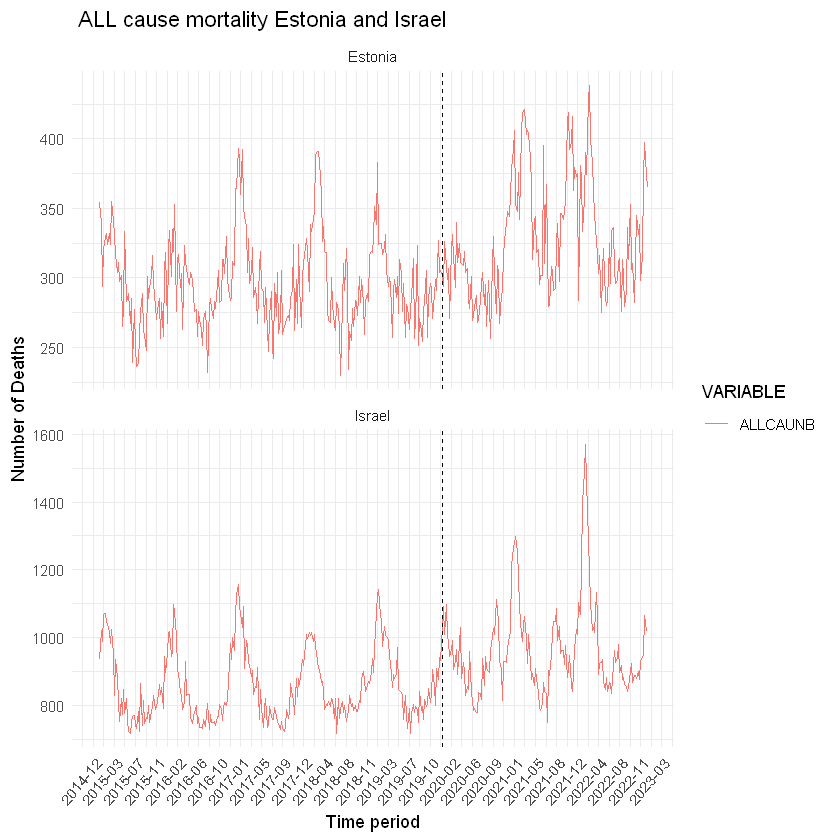

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


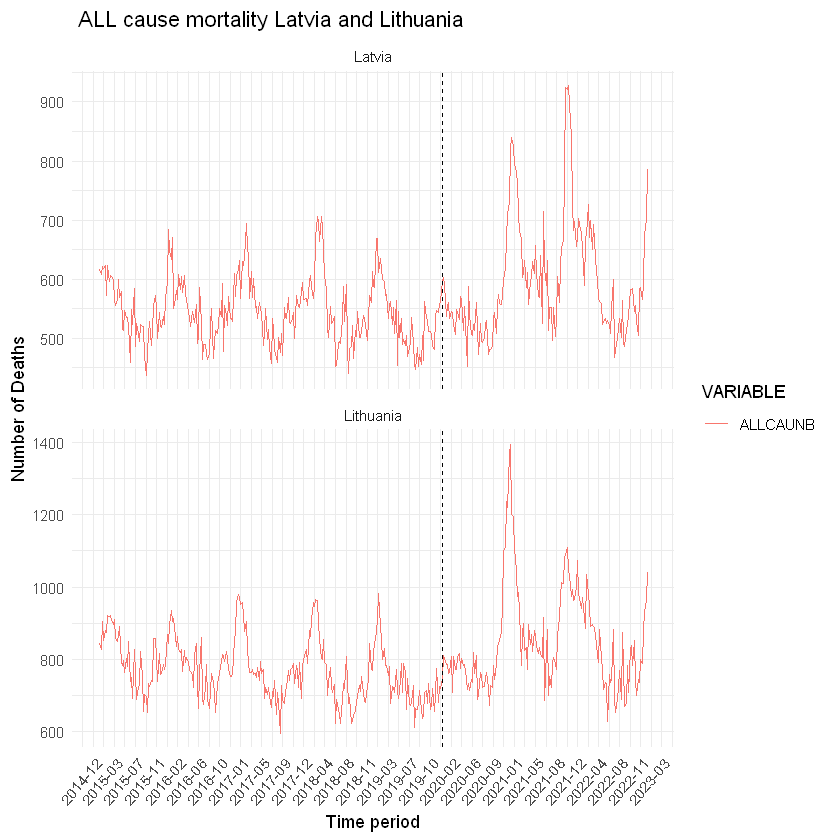

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


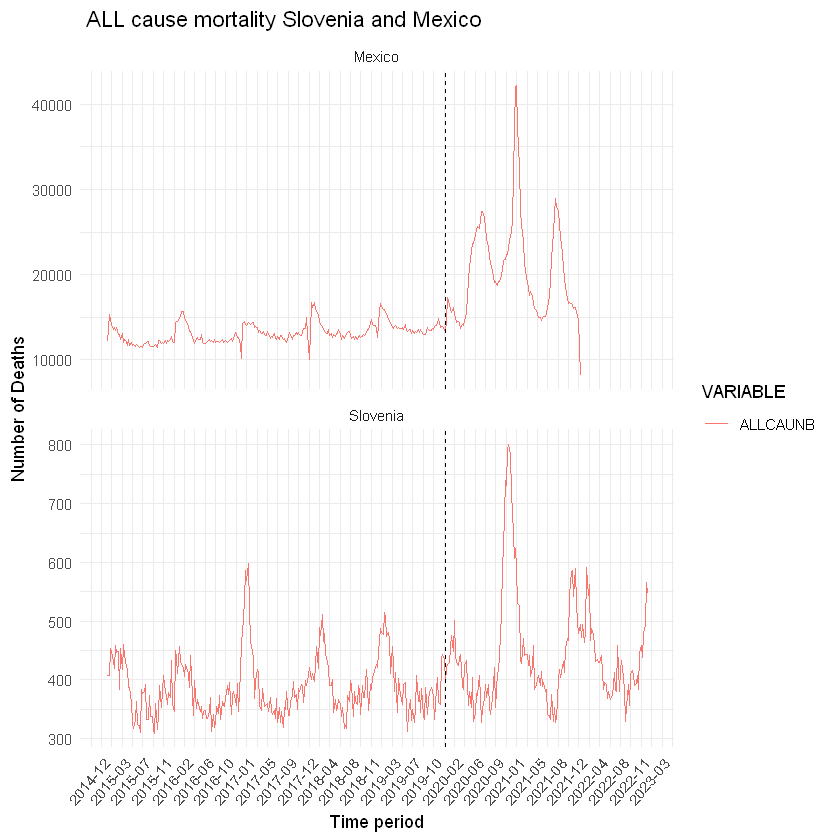

Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


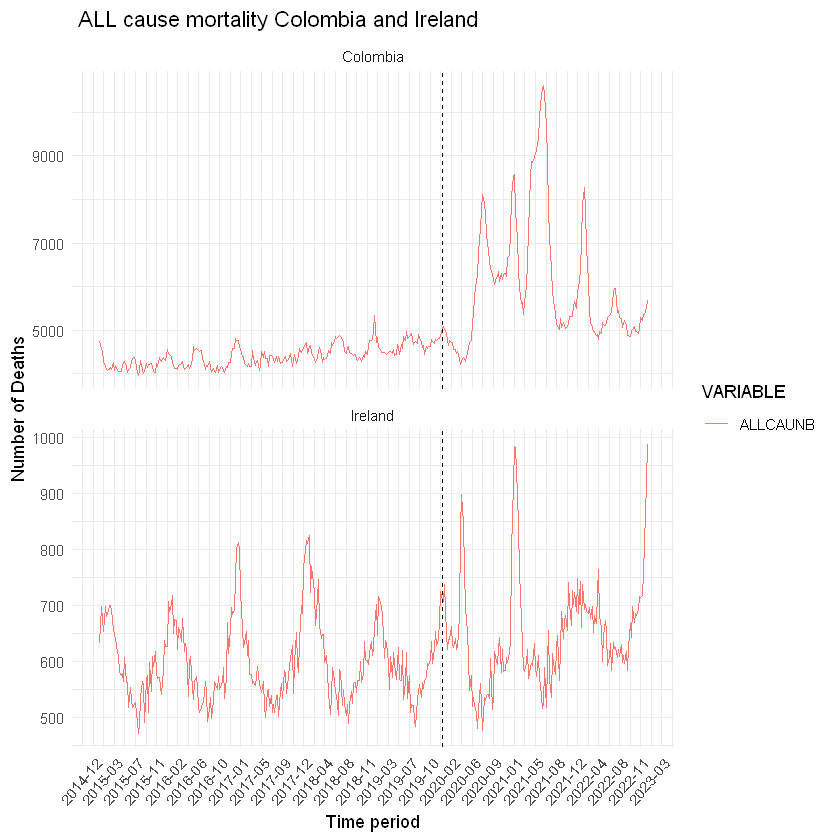

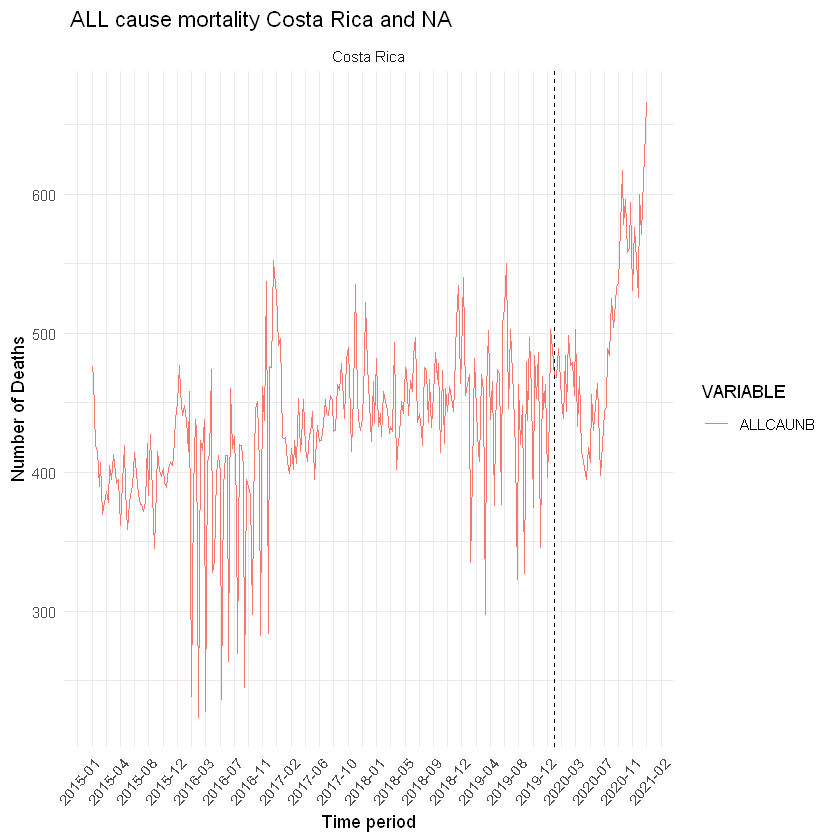

In [35]:
mortality_only <- df %>%
  filter((VARIABLE == "ALLCAUNB") & YEAR >= 2015 & YEAR <= 2022 )


unique_countries <- unique(mortality_only$Country)

for (i in seq(1, length(unique_countries), by = 2)) {
  countries_subset <- unique_countries[i:(i + 1)]
  subset_data <- mortality_only %>% filter(Country %in% countries_subset)
  
  plot_mortality <- ggplot(subset_data, aes(x = Date, y = Value, color = VARIABLE)) +
    geom_line() +
    labs(title = paste(" ALL cause mortality", paste(countries_subset, collapse = " and ")),
         x = "Time period",
         y = "Number of Deaths") +
    scale_x_date(date_labels = "%Y-%m", date_breaks = "16 weeks") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 50, hjust = 1)) +
    geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", color = "black")+
    facet_wrap(~Country, scales = "free_y", ncol = 1)
  
  print(plot_mortality)
}


In [21]:
mortality_only <- df %>%
  filter((VARIABLE == "ALLCAUNB") & YEAR >= 2015 & YEAR <= 2022 )

Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"
Warning message in strptime(x,

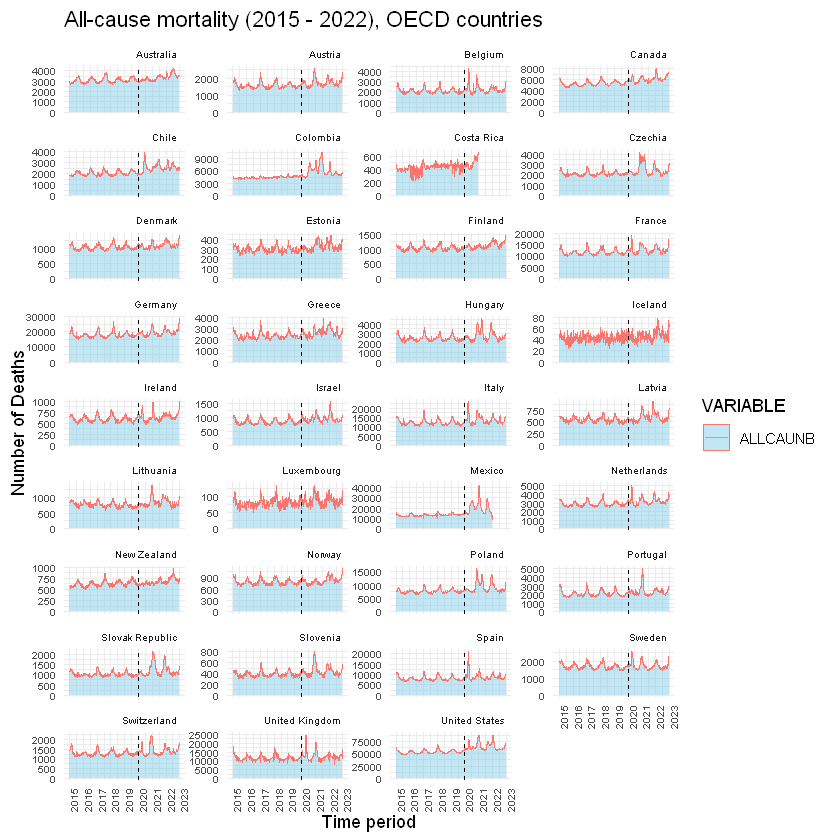

In [22]:
mortality_only$Date <- as.Date(paste(mortality_only$YEAR, mortality_only$WEEK, "1", sep="-"), format="%Y-%U-%u")



allcause_plt <- ggplot(mortality_only, aes(x = Date, y = Value, color = VARIABLE)) +
  geom_line() +
  geom_area(fill = "skyblue", alpha = 0.5) +
  labs(title = "All-cause mortality (2015 - 2022), OECD countries ",
       x = "Time period",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 6, angle = 90, hjust = 1),
        axis.text.y = element_text(size = 6),
        strip.text.x = element_text(size = 6, hjust = 1)) +
        geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", label = "COVID-19",color = "black")+

  facet_wrap(~Country, scales = "free_y", ncol = 4, nrow = 10)

allcause_plt


Warning message:
"Removed 69 rows containing non-finite values (`stat_align()`)."
Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


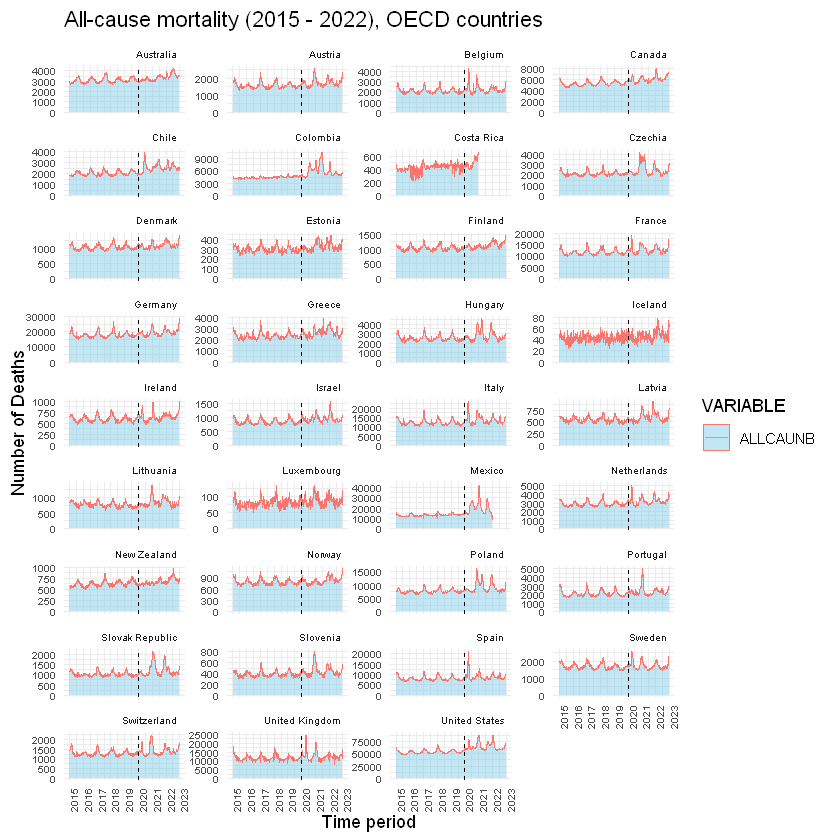

In [44]:
allcause_plt


#
#

For almost all the countries, we can observe patterns such as an increase in mortality during one season and a decrease in another. Upon thorough examination of these patterns, it can be noticed that mortality tends to rise during winter and decline in summer. This seasonal variation in mortality rates may be attributed to factors such as colder temperatures, increased prevalence of respiratory illnesses, and potential effects on lifestyle, which could contribute to the observed trends. 

need to do more research on that ....

# Now using another table, where we have filtered the data from the years 2020 to 2022 and we filled in the missing data for the countries.

time series  for this table is done in Power BI.
   FOR Excess deaths and covid deaths  https://github.com/nbu52/Data601-popHealth3-COVID-19   

 analysis of excess death and covid deaths ... we create table 2 for 2020 to 2022 , filled the missing values for country japan,costa rica and korea, Turkiye . this table has no missing values 

In [1]:
 table_2 = read.csv("final_file_mortality.csv")
head(table_2)

,country,start_date,end_date,week,year,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,30/12/2019,5/01/2020,1,2020,25655289,2928,0,2963.662,-35.66245,2928,0,-0.13623370
2,Australia,6/01/2020,12/01/2020,2,2020,25655289,2902,0,2954.162,-52.16245,2902,0,-0.19926514
3,Australia,13/01/2020,19/01/2020,3,2020,25655289,2915,0,2931.329,-16.32912,2915,0,-0.06237867
4,Australia,20/01/2020,26/01/2020,4,2020,25655289,3009,0,2938.662,70.33755,3009,0,0.26869559
5,Australia,27/01/2020,2/02/2020,5,2020,25655289,2911,0,2897.662,13.33755,2911,0,0.05095060
6,Australia,3/02/2020,9/02/2020,6,2020,25655289,2918,0,2929.329,-11.32912,2918,0,-0.04327823


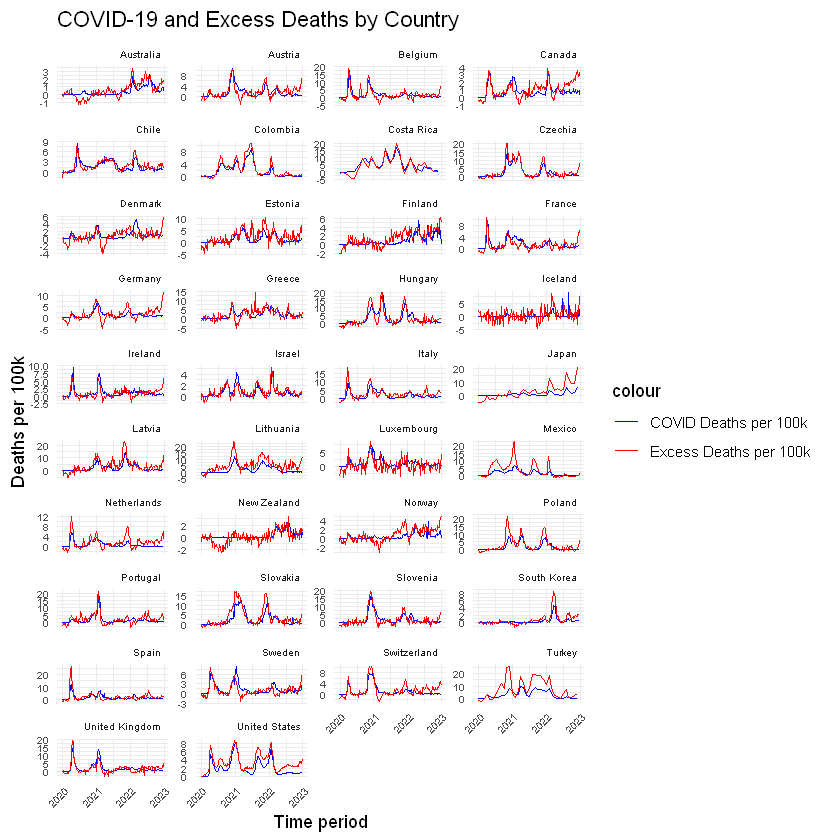

In [46]:
# Plotting
ggplot(table_2, aes(x = as.Date(start_date, format="%d/%m/%Y"))) +
  geom_line(aes(y = covid_deaths_per_100k, color = "COVID Deaths per 100k")) +
  geom_line(aes(y = excess_deaths_per_100k, color = "Excess Deaths per 100k")) +
  labs(x = "Time period", y = "Deaths per 100k", title = "COVID-19 and Excess Deaths by Country") +
  scale_color_manual(values = c("COVID Deaths per 100k" = "blue", "Excess Deaths per 100k" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 6, angle = 45, hjust = 1),
        axis.text.y = element_text(size = 6),
        strip.text.x = element_text(size = 6, hjust = 1)) +
       # Correct placement of strip.text.x
  facet_wrap(~country, scales = "free_y", ncol = 4, nrow = 10) 


# FROM table 3
   plots for this table is also done in Power BI

In [23]:
table_3 = read.csv("20to22_merged_final.csv")
head(table_3)

,country,countrycode,year,total_deaths,covid_deaths,expected_deaths,excess_deaths,population,land_area,Ratio.of.Excess.death.to.COVID.19.deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,GDP_per_capita,Age_65_over_percentage,urban_pop_percentage,Pop_density,Access_to_quality_healthcare
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Australia,AUS,2020,164778,910,168241.20,-3463.205,25655289,7682300,-3.8,163868,3.547027,-13.49899,51868.25,16.2,86,3,72.6
2,Australia,AUS,2021,171718,1359,166854.12,4863.877,25688079,7682300,3.6,170359,5.290392,18.93437,60697.25,16.6,86,3,72.5
3,Australia,AUS,2022,190326,14438,168414.04,21911.965,25978935,7682300,1.5,175888,55.575796,84.34512,65099.85,16.6,86,3,72.5
4,Austria,AUT,2020,91196,7706,83134.64,8061.356,8916845,82409,1.0,83490,86.420701,90.40592,48789.50,19.1,59,108,66.6
5,Austria,AUT,2021,89538,9153,81589.91,7948.094,8951520,82409,0.9,80385,102.250791,88.79044,53517.89,19.4,59,109,66.8
6,Austria,AUT,2022,91582,4689,81758.12,9823.883,9052856,82409,2.1,86893,51.795809,108.51695,52084.68,19.4,59,110,66.8


In [5]:
table_2020 = table_3 %>%
 filter(year == 2020)

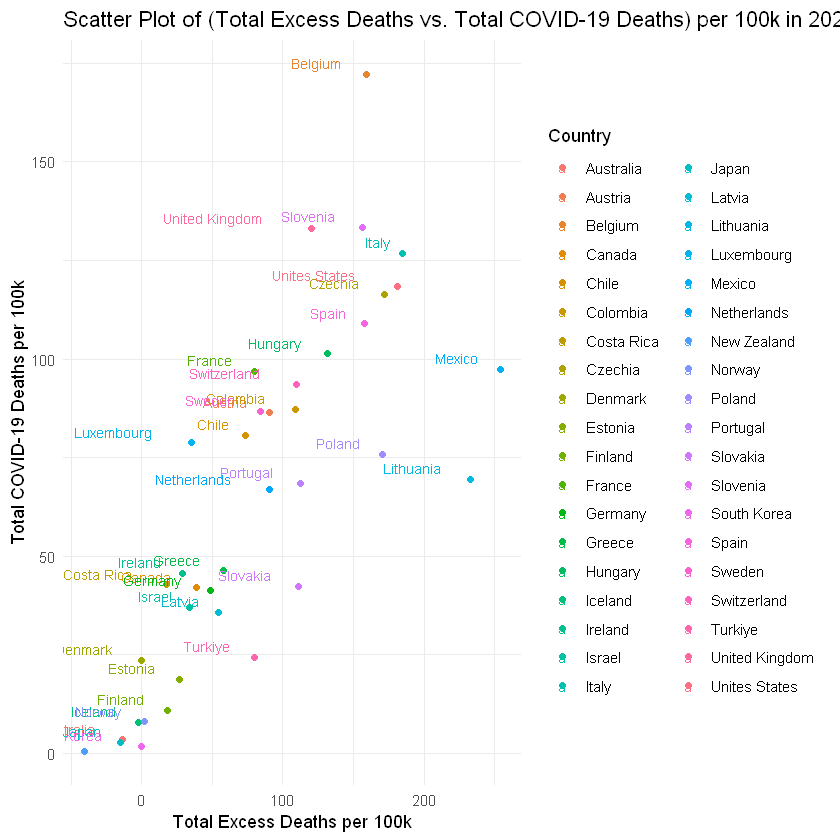

In [10]:
plot_2020 <- ggplot(table_2020, aes(x = excess_deaths_per_100k, y = covid_deaths_per_100k, color = country,label = country)) +
  geom_point() +
  labs(title = "Scatter Plot of (Total Excess Deaths vs. Total COVID-19 Deaths) per 100k in 2020",
       x = "Total Excess Deaths per 100k",
       y = "Total COVID-19 Deaths per 100k",
       color = "Country",
      ) +
geom_text(aes(label = country), vjust = -0.5, hjust = 1.5, size = 3) +
  theme_minimal()
#plot1 = ggplotly(plot1)
plot_2020

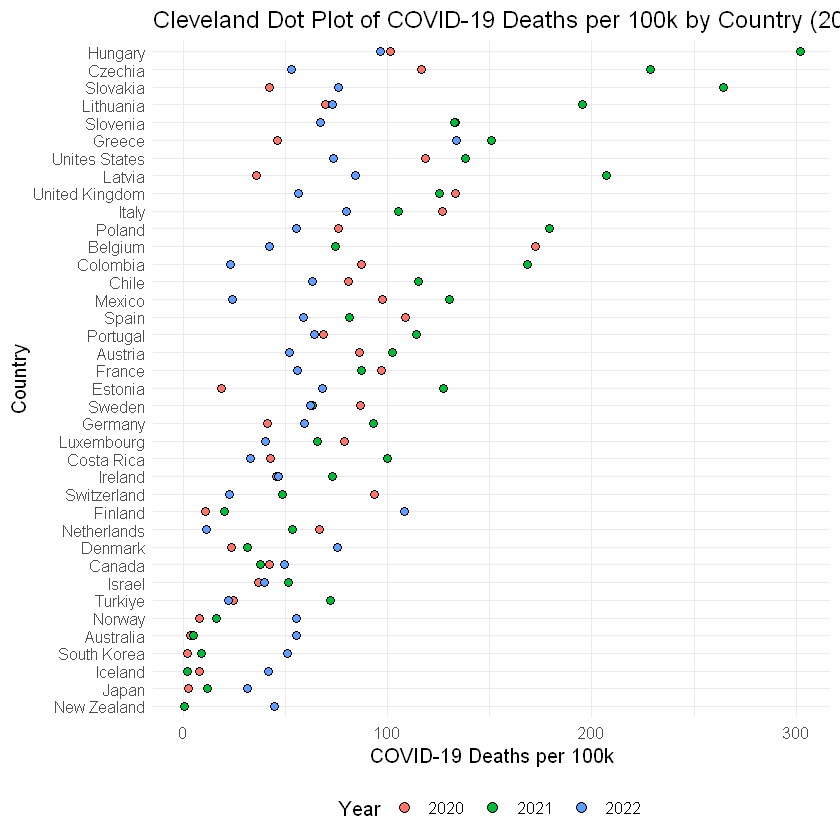

In [11]:

library(ggplot2)




combined_dot_plot <- ggplot(table_3, aes(x = covid_deaths_per_100k, y = reorder(country, covid_deaths_per_100k))) +
  geom_dotplot(aes(fill = as.factor(year)), binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.5) +
  labs(
    title = "Cleveland Dot Plot of COVID-19 Deaths per 100k by Country (2020-2022)",
    x = "COVID-19 Deaths per 100k",
    y = "Country",
    fill = "Year"
  ) +
  scale_size_continuous(range = c(2, 8)) +  # Adjust the size range of the bubbles
  theme_minimal() +
  theme(legend.position = "bottom", text = element_text(size = 12, color = "black"))  

# Display the plot
print(combined_dot_plot)

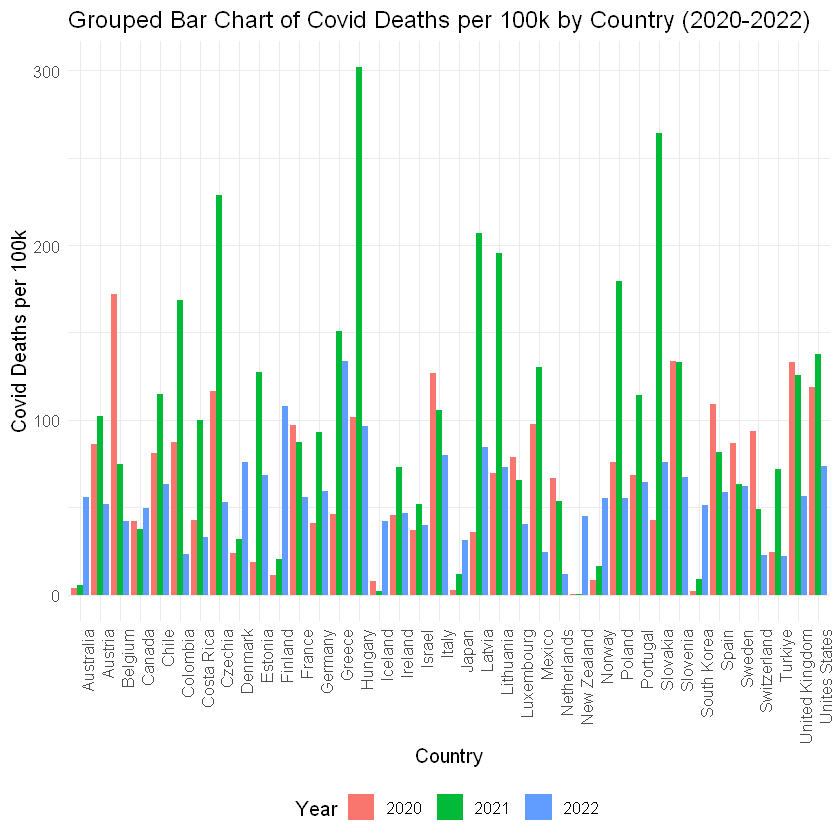

In [12]:
combined_bar_chart_covid <- ggplot(table_3, aes(x = country, y = covid_deaths_per_100k, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    title = "Grouped Bar Chart of Covid Deaths per 100k by Country (2020-2022)",
    x = "Country",
    y = "Covid Deaths per 100k",
    fill = "Year"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    text = element_text(size = 12, color = "black"),
    axis.text.x = element_text(angle = 90, hjust = 1)
  )  
# Display the plot

combined_bar_chart_covid

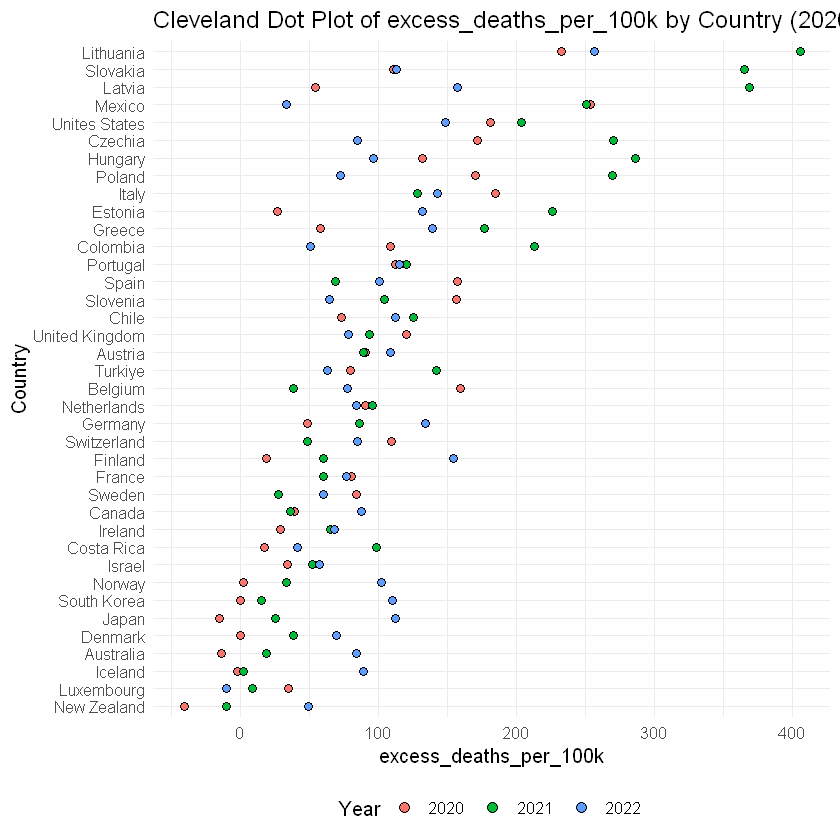

In [13]:
combined_dot_plot_excess <- ggplot(table_3, aes(x = excess_deaths_per_100k, y = reorder(country, excess_deaths_per_100k))) +
  geom_dotplot(aes(fill = as.factor(year)), binaxis = "y", stackdir = "center", position = "dodge", binwidth = 0.5) +
  labs(
    title = "Cleveland Dot Plot of excess_deaths_per_100k by Country (2020-2022)",
    x = "excess_deaths_per_100k",
    y = "Country",
    fill = "Year"
  ) +
  scale_size_continuous(range = c(2, 8)) +  # Adjust the size range of the bubbles
  theme_minimal() +
  theme(legend.position = "bottom", text = element_text(size = 12, color = "black"))  

# Display the plot
print(combined_dot_plot_excess)

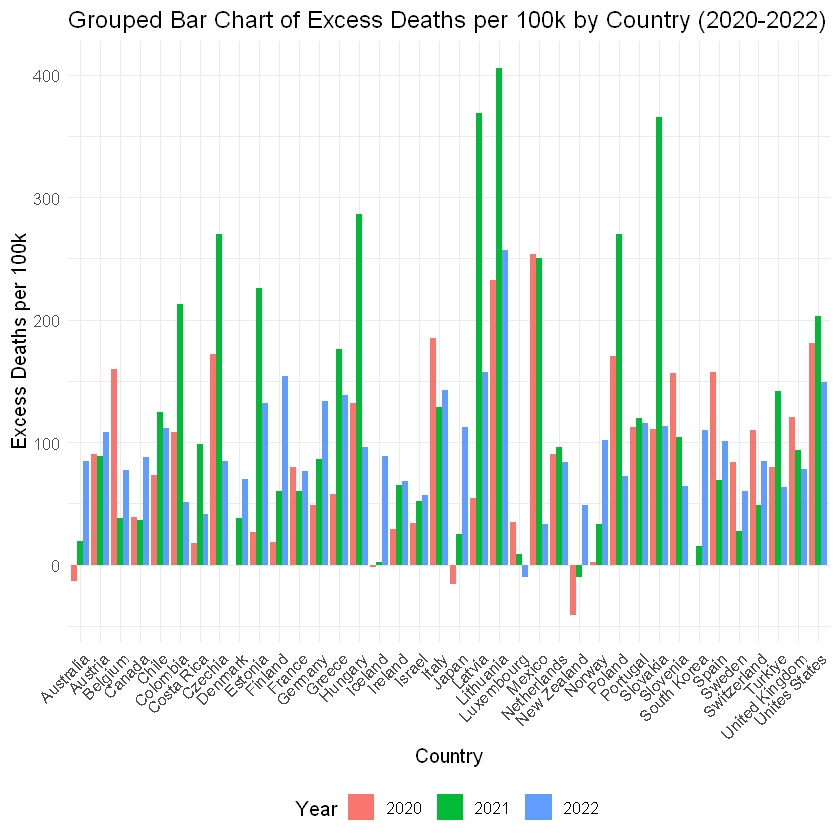

In [14]:
library(ggplot2)

combined_bar_chart_excess <- ggplot(table_3, aes(x = country, y = excess_deaths_per_100k, fill = as.factor(year))) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    title = "Grouped Bar Chart of Excess Deaths per 100k by Country (2020-2022)",
    x = "Country",
    y = "Excess Deaths per 100k",
    fill = "Year"
  ) +
  theme_minimal() +
  theme(
    legend.position = "bottom",
    text = element_text(size = 12, color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )  



combined_bar_chart_excess


# Now  make plot for poster and presentation 

In [3]:
head(df)

,COUNTRY,Country,WEEK,GENDER,AGE,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2015,2925,,
2,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2016,2799,,
3,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2017,2895,,
4,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2018,2819,,
5,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2019,2966,,
6,AUS,Australia,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2020,2928,,


# lets choose New zealand and Poland

In [15]:
nzdf = df %>%
     filter(COUNTRY == "NZL", VARIABLE == "ALLCAUNB" & YEAR >= 2015 & YEAR <= 2022)


In [18]:
head(nzdf)

,COUNTRY,Country,WEEK,GENDER,AGE,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2015,564,,
2,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2016,564,,
3,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2017,528,,
4,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2018,583,,
5,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2019,609,,
6,NZL,New Zealand,1,TOTAL,TOTAL,ALLCAUNB,All-cause deaths (number),2020,590,,


In [19]:
nzdf$Date <- as.Date(paste(nzdf$YEAR, nzdf$WEEK, "1", sep="-"), format="%Y-%U-%u")

plot_nz <- ggplot(nzdf, aes(x = Date, y = Value, color = COUNTRY)) +
  geom_line() +
  labs(title = "All-cause Deaths (2015-2022)",
       x = "Year",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", color = "black") 


Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 368 in year 2015 is invalid"
Warning message in strptime(x, format, tz = "GMT"):
"(0-based) yday 369 in year 2020 is invalid"


Warning message:
"Removed 2 rows containing missing values (`geom_line()`)."


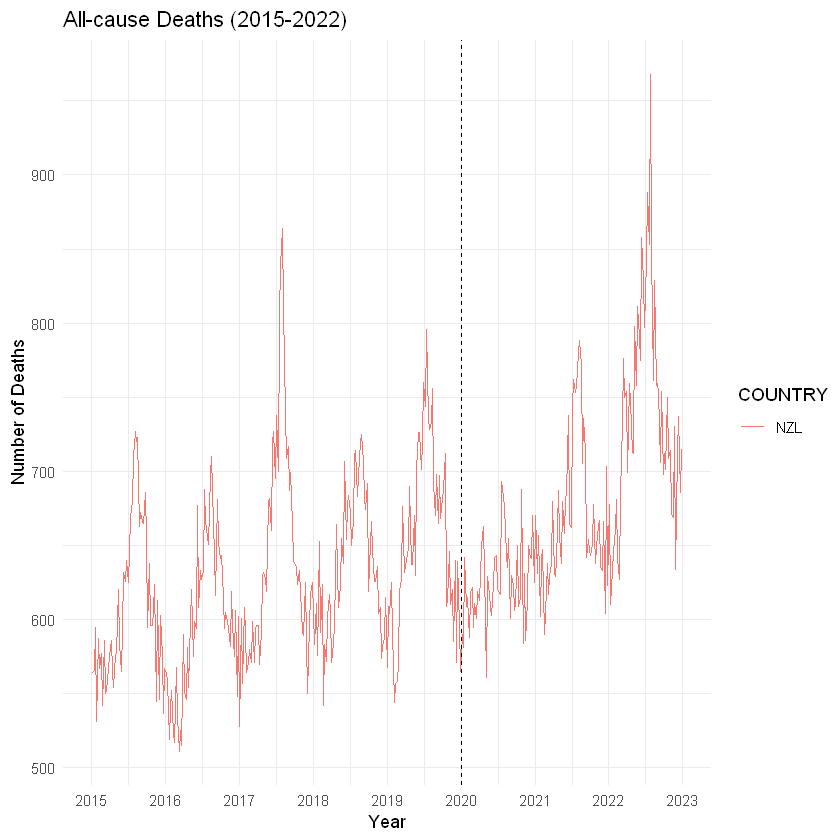

In [20]:
plot_nz

Warning message in geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", :
"Ignoring unknown parameters: `label`"


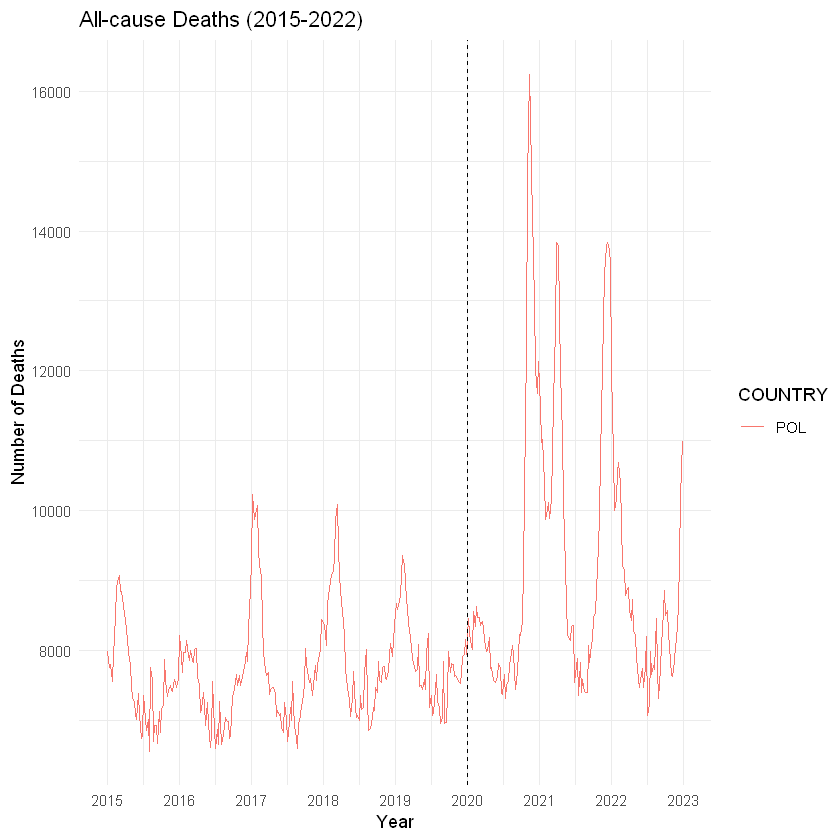

In [65]:
poldf = df %>%
     filter(COUNTRY == "POL", VARIABLE == "ALLCAUNB" & YEAR >= 2015 & YEAR <= 2022)
 

poldf$Date <- as.Date(paste(poldf$YEAR, poldf$WEEK, "1", sep="-"), format="%Y-%U-%u")

plot_pol <- ggplot(poldf, aes(x = Date, y = Value, color = COUNTRY)) +
  geom_line() +
  labs(title = "All-cause Deaths (2015-2022)",
       x = "Year",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal() +
  geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", label = "COVID-19",color = "black") 
plot_pol

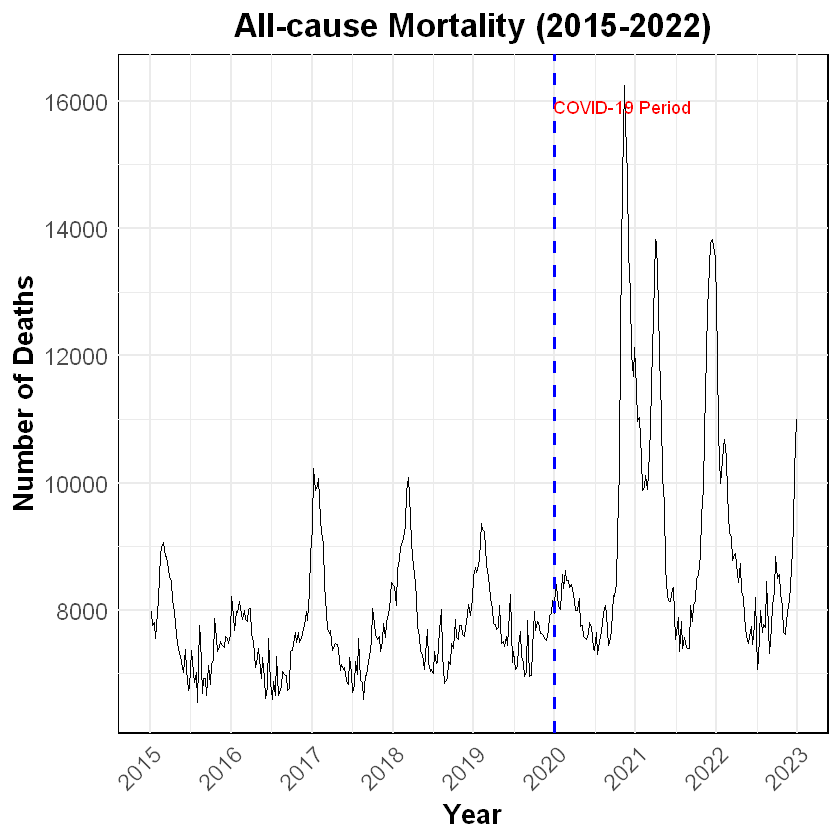

In [76]:
library(ggplot2)

valid_weeks <- poldf$WEEK <= 52
poldf <- poldf[valid_weeks,]

# Convert week and year to a Date object (assuming week starts on Monday)
poldf$Date <- as.Date(paste(poldf$YEAR, poldf$WEEK, "1", sep="-"), format="%Y-%U-%u")

# Calculate the average mortality for the baseline period
baseline_mortality <- mean(poldf$Value, na.rm = TRUE)

# Define the x positions for the annotations based on dates
start_of_covid_date <- as.Date("2020-01-01")  # Start of COVID-19
baseline_start_date <- as.Date("2015-01-01")  # Start of baseline period
end_of_baseline_date <- as.Date("2019-12-31")
baseline_mortality_position <- baseline_mortality + 2500


# Plot the data
plot_pol <- ggplot(poldf, aes(x = Date, y = Value)) +
  geom_line() +
  labs(title = "All-cause Mortality (2015-2022)",
       x = "Year",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal(base_size = 14) +  # Increase the base font size
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Title style
    axis.title = element_text(size = 16, face = "bold"),  # Axis titles style
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 14),  # X axis text style
    axis.text.y = element_text(size = 14),  # Y axis text style
    legend.position = "bottom",  # Position the legend at the bottom
    legend.text = element_text(size = 12),  # Legend text style
    #panel.grid.major = element_line(color = "#cccccc"),  # Major grid line color
    #panel.grid.minor = element_blank(),  # Hide minor grid lines
    panel.background = element_rect(fill = "white", colour = "black")  # Panel background color
  ) +
  
  geom_vline(xintercept = as.numeric(start_of_covid_date), linetype = "dashed", color = "blue", size = 1) +
  annotate("text", x = as.Date("2020-11-01"), y = max(poldf$Value, na.rm = TRUE), label = "COVID-19 Period", color = "red", vjust = 2) 
  
print(plot_pol)


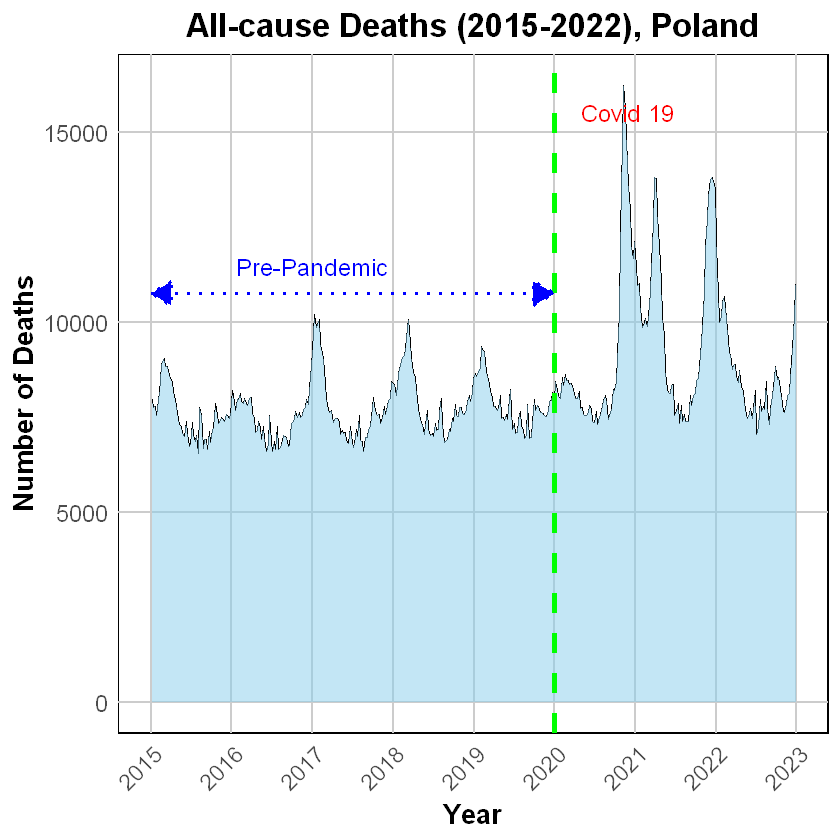

In [68]:
plot_pol <- ggplot(poldf, aes(x = Date, y = Value)) +
  geom_line() +
 geom_area(fill = "skyblue", alpha = 0.5) +  
  labs(title = "All-cause Deaths (2015-2022), Poland",
       x = "Year",
       y = "Number of Deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal(base_size = 14) +  # Increase the base font size
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Title style
    axis.title = element_text(size = 16, face = "bold"),  # Axis titles style
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 14),  # X axis text style
    axis.text.y = element_text(size = 14),  # Y axis text style
    legend.position = "bottom",  # Position the legend at the bottom
    legend.text = element_text(size = 12),  # Legend text style
    panel.grid.major = element_line(color = "#cccccc"),  # Major grid line color
    panel.grid.minor = element_blank(),  # Hide minor grid lines
    panel.background = element_rect(fill = "white", colour = "black")  # Panel background color
  ) +
  geom_vline(xintercept = as.numeric(start_of_covid_date), linetype = "dashed", color = "green", size = 1.5) +
  annotate("text", x = as.Date("2020-12-01"), y = max(poldf$Value, na.rm = TRUE), label = "Covid 19", color = "red", vjust = 2, size = 5) +
  geom_segment(aes(x = baseline_start_date, y = baseline_mortality_position, xend = end_of_baseline_date, yend = baseline_mortality_position), 
               linetype = "dotted", color = "blue", size = 1, arrow = arrow(type = "closed", ends = "both", length = unit(0.2, "inches"))) +
  annotate("text", x = as.Date("2017-01-01"), y = baseline_mortality_position, label = "Pre-Pandemic", color = "blue", vjust = -1, size = 5)

# Print the plot
print(plot_pol)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


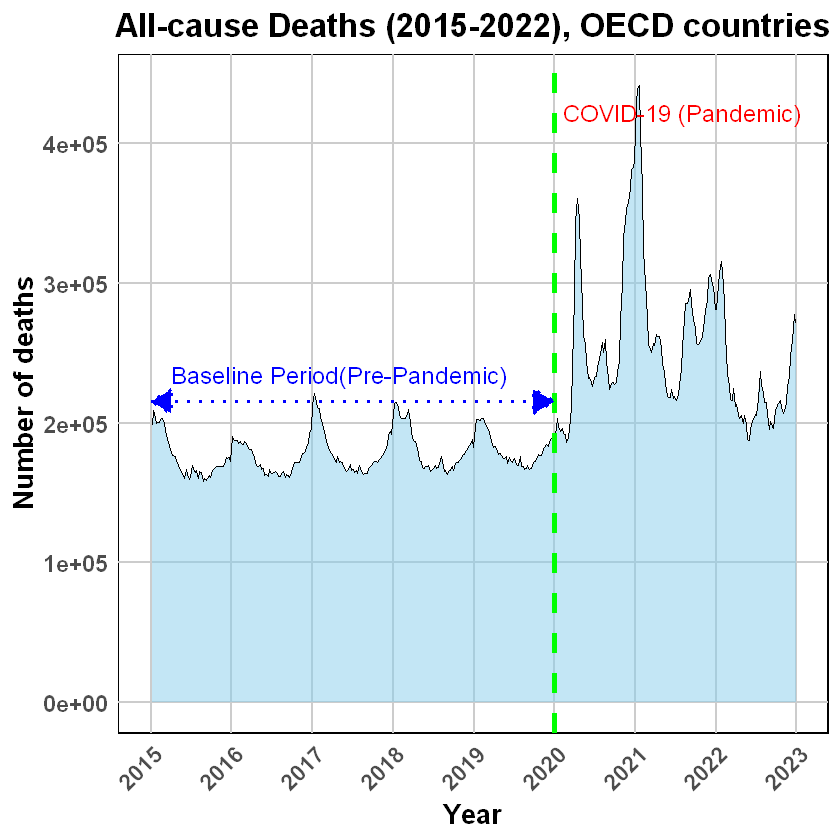

In [55]:
library(ggplot2)
library(dplyr)
df = df %>%
   
     filter( YEAR >= 2015 & YEAR <= 2022)

# Filter out invalid weeks
valid_weeks <- df$WEEK <= 52
df <- df[valid_weeks,]

# Convert week and year to a Date object
df$Date <- as.Date(paste(df$YEAR, df$WEEK, "1", sep="-"), format="%Y-%U-%u")

# Aggregate data by Date to get the average or total number of deaths per date across all countries
df_aggregated <- df %>%
  group_by(Date) %>%
  summarize(Average_Value = sum(Value, na.rm = TRUE))  # Replace mean with sum if you want the total

# Calculate the average mortality for the baseline period
baseline_mortality <- mean(df_aggregated$Average_Value, na.rm = TRUE)
baseline_mortality_position <- baseline_mortality + 9000

# Define the end date for the baseline period
end_of_baseline_date <- as.Date("2019-12-31")

# Create the plot
plot_oecd <- ggplot(df_aggregated, aes(x = Date, y = Average_Value)) +
  geom_area(fill = "skyblue", alpha = 0.5) +
  geom_line() +
  labs(title = "All-cause Deaths (2015-2022), OECD countries",
       x = "Year",
       y = "Number of deaths") +
  scale_x_date(date_labels = "%Y", date_breaks = "1 year") +
  theme_minimal(base_size = 14) +
 theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Title style
    axis.title = element_text(size = 16, face = "bold"),  # Axis titles style
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 14,face = "bold"),  # X axis text style
    axis.text.y = element_text(size = 14,face = "bold"),  # Y axis text style
    legend.position = "bottom",  # Position the legend at the bottom
    legend.text = element_text(size = 12),  # Legend text style
    panel.grid.major = element_line(color = "#cccccc"),  # Major grid line color
    panel.grid.minor = element_blank(),  # Hide minor grid lines
    panel.background = element_rect(fill = "white", colour = "black")  # Panel background color
  ) +

  geom_vline(xintercept = as.numeric(as.Date("2020-01-01")), linetype = "dashed", color = "green", size = 1.5) +
  annotate("text", x = as.Date("2021-08-01"), y = max(df_aggregated$Average_Value, na.rm = TRUE), label = "COVID-19 (Pandemic)", color = "red", vjust = 2, size =5) +
  geom_segment(aes(x = as.Date("2015-01-01"), y = baseline_mortality_position, xend = end_of_baseline_date, yend = baseline_mortality_position), 
               linetype = "dotted", color = "blue", size = 1, arrow = arrow(type = "closed", ends = "both", length = unit(0.2, "inches"))) +
  annotate("text", x = as.Date("2017-05-01"), y = baseline_mortality_position, label = "Baseline Period(Pre-Pandemic)", color = "blue", vjust = -1, size = 5)

print(plot_oecd)


Observations on All-Cause Mortality Changes During the Pandemic:

Upon analyzing the available data, it has been observed that all-cause mortality patterns exhibited variations during the pandemic compared to pre-pandemic years.We initially presumed that mortality rates would uniformly increase; however, the actual changes appeared to be more nuanced and varied by country.

In some instances, certain countries experienced a decrease in mortality at various points during the pandemic period, while others saw increases. The magnitude of these changes also differed significantly between countries. A few countries witnessed a substantial rise in all-cause mortality, others reported more moderate shifts, and some fluctuated between increases and decreases.



## Let's try to plot  for different  age Group

In [32]:
# OUR MAIN TABLE 
head(OECD)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2015,174,,
2,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2016,140,,
3,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2017,167,,
4,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2018,149,,
5,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2019,182,,
6,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2020,171,,


In [33]:
Age_only = OECD %>%
    filter(GENDER == "TOTAL") %>%
    filter(YEAR %in% c(2020, 2021, 2022)) %>%
  filter(Age %in% c('0 to 44', '45 to 64', '65 and over')) 



In [34]:
head(Age_only)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,Variable,YEAR,Value,Flag.Codes,Flags
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2020,171,,
2,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2021,153,,
3,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2022,170,,
4,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2020,129,,
5,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2021,148,,
6,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,All-cause deaths (number),2022,160,,


In [39]:

Age_only <- Age_only %>% select(-Flag.Codes, -Flags, -Variable)

In [40]:
head(Age_only)

,COUNTRY,Country,WEEK,GENDER,Age,VARIABLE,YEAR,Value
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,2020,171
2,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,2021,153
3,AUS,Australia,1,TOTAL,0 to 44,ALLCAUNB,2022,170
4,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,2020,129
5,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,2021,148
6,AUS,Australia,2,TOTAL,0 to 44,ALLCAUNB,2022,160


In [41]:
wide_data <- Age_only %>% 
  spread(key = VARIABLE, value = Value)

In [42]:
head(wide_data)

,COUNTRY,Country,WEEK,GENDER,Age,YEAR,ALLCAUNB,COVIDNB,EXCESSNB
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,AUS,Australia,1,TOTAL,0 to 44,2020,171,NA,8.6
2,AUS,Australia,1,TOTAL,0 to 44,2021,153,NA,-9.4
3,AUS,Australia,1,TOTAL,0 to 44,2022,170,NA,7.6
4,AUS,Australia,1,TOTAL,45 to 64,2020,395,NA,0.6
5,AUS,Australia,1,TOTAL,45 to 64,2021,417,NA,22.6
6,AUS,Australia,1,TOTAL,45 to 64,2022,444,NA,49.6


In [48]:
data_grouped <- wide_data %>%
  group_by(YEAR, Age) %>%
  summarise(Excess_deaths_number = sum(EXCESSNB, na.rm = TRUE))



`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.


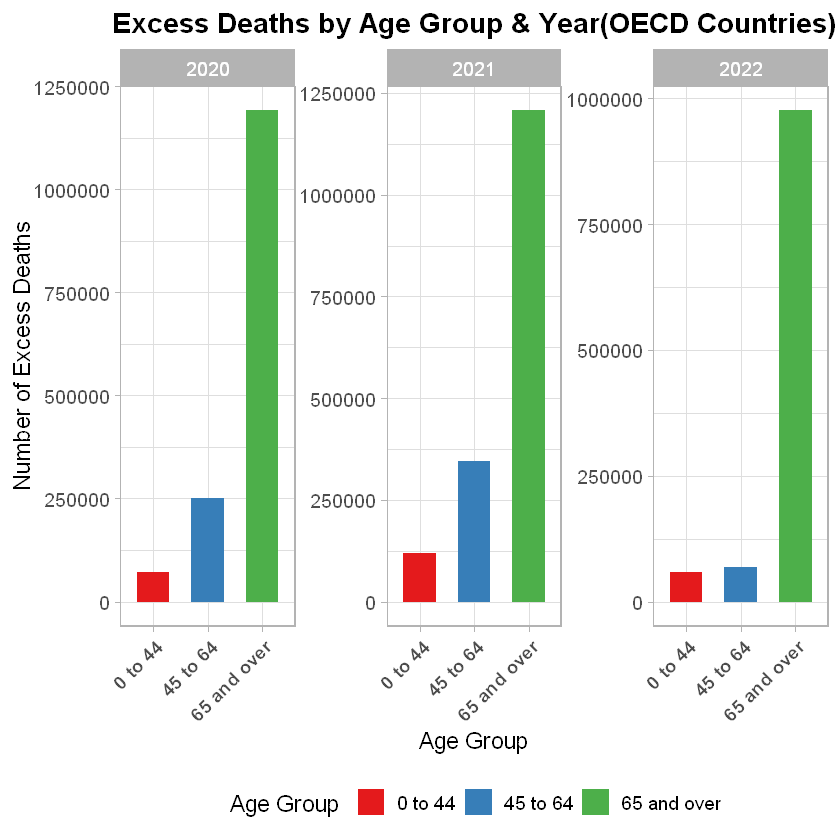

In [54]:

p <- ggplot(data_grouped, aes(x = Age, y = Excess_deaths_number, fill = Age)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
  scale_fill_brewer(palette = "Set1", name = "Age Group") +
  facet_wrap(~ YEAR, scales = 'free_y') +
  theme_light(base_size = 14) +
  labs(title = "Excess Deaths by Age Group & Year(OECD Countries)",
       x = "Age Group",
       y = "Number of Excess Deaths") +
  theme(legend.position = "bottom",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1,face = "bold"),
        plot.title = element_text(hjust = 0.5, face = "bold"))

print(p)